In [19]:
import os 
import sys
from tqdm import tqdm
import importlib
import numpy as np
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt

module_path = '/home/lun/project-basileus/seq-gan/sgtlstm'
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
if 'sgtlstm' in sys.modules:
    importlib.reload(sys.modules['sgtlstm'])

from sgtlstm.utils import load_fixed_length_sequence_from_pickle, create_dataset
from sgtlstm.utils import create_dataset
from sgtlstm.SeqGan import build_G, build_D
from sgtlstm.pretrain import pretrain_generator, pretrain_discriminator, create_self_regression_data_batch
from sgtlstm.TimeLSTM import TimeLSTM0, TimeLSTM1, TimeLSTM2, TimeLSTM3

import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD

## Load data 

In [3]:
valid_data_path = '/home/lun/project-basileus/seq-gan/data/fixed_length_with_init_token/valid_sequences.pickle'
invalid_data_path = '/home/lun/project-basileus/seq-gan/data/fixed_length_with_init_token/invalid_sequences.pickle'

valid_event_type_seqs, valid_timestamp_seqs = load_fixed_length_sequence_from_pickle(valid_data_path, to_timedelta=True, end_token=0)
invalid_event_type_seqs, invalid_timestamp_seqs = load_fixed_length_sequence_from_pickle(invalid_data_path, to_timedelta=True, end_token=0)

## Global Variables 

In [4]:
BATCH_SIZE = 128
T = 10 + 1
VOCAB = ['END/PADDING', 'INIT', 'start', 'click', 'install']
EVENT_VOCAB_DIM = len(VOCAB)
EMB_DIM = 5
HIDDEN_DIM = 64
K_MIST = 2

END_TOKEN = 0
MAX_TIME = 1024

## G and D

In [ ]:
# generator = build_G(
#     T = T,
#     event_vocab_dim = EVENT_VOCAB_DIM,
#     emb_dim = EMB_DIM,
#     hidden_dim= HIDDEN_DIM,
#     k_mixt = K_MIST,
#     return_sequence=False,
# )


# discriminator = build_D(
#     T = T,
#     event_vocab_dim = EVENT_VOCAB_DIM,
#     emb_dim = EMB_DIM,
#     hidden_dim= HIDDEN_DIM,
#     k_mixt = K_MIST
# )

## Pretrain G

In [24]:
pretrain_G_et = valid_event_type_seqs
pretrain_G_ts = valid_timestamp_seqs
pretrain_G_labels = np.ones((valid_event_type_seqs.shape[0], 1))

pretrain_G_features = (pretrain_G_et, pretrain_G_ts)
N_pretrain_G = pretrain_G_et.shape[0]

In [28]:
WEIGHT_GAUSSIAN_LOSS = 1e-2
OPTIMIZER = Adam(lr=1e-3)

EPOCHS = 2
_TOTAL_STEPS = int(EPOCHS * N_pretrain_G / 1)


pretrain_G_dataset = create_dataset(pretrain_G_features,
                                  pretrain_G_labels,
                                  batch_size=1,
                                  epochs=EPOCHS,
                                  buffer_size=N_pretrain_G)

pretrained_generator = build_G(
    T = T,
    event_vocab_dim = EVENT_VOCAB_DIM,
    emb_dim = EMB_DIM,
    hidden_dim= HIDDEN_DIM,
    k_mixt = K_MIST,
    return_sequence=False,
)

No Normalization in G!
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
sigma > 1 !!


In [29]:
_TOTAL_STEPS

20000

In [ ]:
pretrain_gen_ce_loss_history = []
pretrain_gen_gaussian_loss_history = []
step = 0

for feature_sample, _ in tqdm(pretrain_G_dataset.take(_TOTAL_STEPS)):
    step += 1
    print('Training Step:', step)
        
    gen_ce_loss, gen_gaussian_loss =  pretrain_generator(feature_sample, 
                                                         pretrained_generator,
                                                         event_vocab_dim=EVENT_VOCAB_DIM, 
                                                         verbose=False, 
                                                         weight_gaussian_loss=WEIGHT_GAUSSIAN_LOSS, 
                                                         optimizer=OPTIMIZER)
        
    pretrain_gen_ce_loss_history.append(gen_ce_loss.numpy())
    pretrain_gen_gaussian_loss_history.append(gen_gaussian_loss.numpy())

0it [00:00, ?it/s]

Training Step: 1
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full 

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full 

1it [00:02,  2.27s/it]

Training Step: 2


2it [00:03,  2.03s/it]

Training Step: 3


3it [00:05,  1.83s/it]

Training Step: 4


4it [00:06,  1.73s/it]

Training Step: 5


5it [00:07,  1.62s/it]

Training Step: 6


6it [00:09,  1.58s/it]

Training Step: 7


7it [00:10,  1.55s/it]

Training Step: 8


8it [00:12,  1.49s/it]

Training Step: 9


9it [00:13,  1.50s/it]

Training Step: 10


10it [00:15,  1.45s/it]

Training Step: 11


11it [00:16,  1.47s/it]

Training Step: 12


12it [00:17,  1.43s/it]

Training Step: 13


13it [00:19,  1.45s/it]

Training Step: 14


14it [00:20,  1.42s/it]

Training Step: 15


15it [00:22,  1.44s/it]

Training Step: 16


16it [00:23,  1.46s/it]

Training Step: 17


17it [00:25,  1.42s/it]

Training Step: 18


18it [00:26,  1.44s/it]

Training Step: 19


19it [00:27,  1.41s/it]

Training Step: 20


20it [00:29,  1.43s/it]

Training Step: 21


21it [00:30,  1.39s/it]

Training Step: 22


22it [00:32,  1.42s/it]

Training Step: 23


23it [00:33,  1.40s/it]

Training Step: 24


24it [00:35,  1.43s/it]

Training Step: 25


25it [00:36,  1.45s/it]

Training Step: 26


26it [00:37,  1.42s/it]

Training Step: 27


27it [00:39,  1.44s/it]

Training Step: 28


28it [00:40,  1.41s/it]

Training Step: 29


29it [00:42,  1.43s/it]

Training Step: 30


30it [00:43,  1.41s/it]

Training Step: 31


31it [00:45,  1.43s/it]

Training Step: 32


32it [00:46,  1.40s/it]

Training Step: 33


33it [00:47,  1.42s/it]

Training Step: 34


34it [00:49,  1.45s/it]

Training Step: 35


35it [00:50,  1.43s/it]

Training Step: 36


36it [00:52,  1.45s/it]

Training Step: 37


37it [00:53,  1.42s/it]

Training Step: 38


38it [00:55,  1.44s/it]

Training Step: 39


39it [00:56,  1.42s/it]

Training Step: 40


40it [00:57,  1.44s/it]

Training Step: 41


41it [00:59,  1.41s/it]

Training Step: 42


42it [01:00,  1.43s/it]

Training Step: 43


43it [01:02,  1.45s/it]

Training Step: 44


44it [01:03,  1.41s/it]

Training Step: 45


45it [01:05,  1.43s/it]

Training Step: 46


46it [01:06,  1.40s/it]

Training Step: 47


47it [01:07,  1.42s/it]

Training Step: 48


48it [01:09,  1.39s/it]

Training Step: 49


49it [01:10,  1.42s/it]

Training Step: 50


50it [01:12,  1.40s/it]

Training Step: 51


51it [01:13,  1.42s/it]

Training Step: 52


52it [01:14,  1.44s/it]

Training Step: 53


53it [01:16,  1.41s/it]

Training Step: 54


54it [01:17,  1.43s/it]

Training Step: 55


55it [01:19,  1.41s/it]

Training Step: 56


56it [01:20,  1.43s/it]

Training Step: 57


57it [01:21,  1.41s/it]

Training Step: 58


58it [01:23,  1.42s/it]

Training Step: 59


59it [01:24,  1.39s/it]

Training Step: 60


60it [01:26,  1.41s/it]

Training Step: 61


61it [01:27,  1.44s/it]

Training Step: 62


62it [01:29,  1.41s/it]

Training Step: 63


63it [01:30,  1.42s/it]

Training Step: 64


64it [01:31,  1.39s/it]

Training Step: 65


65it [01:33,  1.41s/it]

Training Step: 66


66it [01:34,  1.38s/it]

Training Step: 67


67it [01:36,  1.40s/it]

Training Step: 68


68it [01:37,  1.37s/it]

Training Step: 69


69it [01:38,  1.40s/it]

Training Step: 70


70it [01:40,  1.43s/it]

Training Step: 71


71it [01:41,  1.39s/it]

Training Step: 72


72it [01:43,  1.43s/it]

Training Step: 73


73it [01:44,  1.41s/it]

Training Step: 74


74it [01:46,  1.44s/it]

Training Step: 75


75it [01:47,  1.43s/it]

Training Step: 76


76it [01:49,  1.47s/it]

Training Step: 77


77it [01:50,  1.45s/it]

Training Step: 78


78it [01:51,  1.49s/it]

Training Step: 79


79it [01:53,  1.51s/it]

Training Step: 80


80it [01:54,  1.48s/it]

Training Step: 81


81it [01:56,  1.47s/it]

Training Step: 82


82it [01:57,  1.43s/it]

Training Step: 83


83it [01:59,  1.44s/it]

Training Step: 84


84it [02:00,  1.41s/it]

Training Step: 85


85it [02:02,  1.43s/it]

Training Step: 86


86it [02:03,  1.41s/it]

Training Step: 87


87it [02:04,  1.43s/it]

Training Step: 88


88it [02:06,  1.45s/it]

Training Step: 89


89it [02:07,  1.42s/it]

Training Step: 90


90it [02:09,  1.44s/it]

Training Step: 91


91it [02:10,  1.44s/it]

Training Step: 92


92it [02:12,  1.46s/it]

Training Step: 93


93it [02:13,  1.43s/it]

Training Step: 94


94it [02:14,  1.45s/it]

Training Step: 95


95it [02:16,  1.42s/it]

Training Step: 96


96it [02:17,  1.43s/it]

Training Step: 97


97it [02:19,  1.45s/it]

Training Step: 98


98it [02:20,  1.42s/it]

Training Step: 99


99it [02:22,  1.43s/it]

Training Step: 100


100it [02:23,  1.41s/it]

Training Step: 101


101it [02:24,  1.42s/it]

Training Step: 102


102it [02:26,  1.39s/it]

Training Step: 103


103it [02:27,  1.41s/it]

Training Step: 104


104it [02:29,  1.38s/it]

Training Step: 105


105it [02:30,  1.40s/it]

Training Step: 106


106it [02:31,  1.42s/it]

Training Step: 107


107it [02:33,  1.40s/it]

Training Step: 108


108it [02:34,  1.42s/it]

Training Step: 109


109it [02:36,  1.39s/it]

Training Step: 110


110it [02:37,  1.41s/it]

Training Step: 111


111it [02:38,  1.39s/it]

Training Step: 112


112it [02:40,  1.42s/it]

Training Step: 113


113it [02:41,  1.41s/it]

Training Step: 114


114it [02:43,  1.43s/it]

Training Step: 115


115it [02:44,  1.44s/it]

Training Step: 116


116it [02:46,  1.42s/it]

Training Step: 117


117it [02:47,  1.44s/it]

Training Step: 118


118it [02:48,  1.42s/it]

Training Step: 119


119it [02:50,  1.44s/it]

Training Step: 120


120it [02:51,  1.42s/it]

Training Step: 121


121it [02:53,  1.44s/it]

Training Step: 122


122it [02:54,  1.42s/it]

Training Step: 123


123it [02:56,  1.44s/it]

Training Step: 124


124it [02:57,  1.45s/it]

Training Step: 125


125it [02:58,  1.41s/it]

Training Step: 126


126it [03:00,  1.44s/it]

Training Step: 127


127it [03:01,  1.41s/it]

Training Step: 128


128it [03:03,  1.42s/it]

Training Step: 129


129it [03:04,  1.39s/it]

Training Step: 130


130it [03:05,  1.41s/it]

Training Step: 131


131it [03:07,  1.39s/it]

Training Step: 132


132it [03:08,  1.41s/it]

Training Step: 133


133it [03:10,  1.43s/it]

Training Step: 134


134it [03:11,  1.40s/it]

Training Step: 135


135it [03:13,  1.43s/it]

Training Step: 136


136it [03:14,  1.41s/it]

Training Step: 137


137it [03:15,  1.45s/it]

Training Step: 138


138it [03:17,  1.42s/it]

Training Step: 139


139it [03:18,  1.44s/it]

Training Step: 140


140it [03:20,  1.41s/it]

Training Step: 141


141it [03:21,  1.43s/it]

Training Step: 142


142it [03:23,  1.44s/it]

Training Step: 143


143it [03:24,  1.41s/it]

Training Step: 144


144it [03:25,  1.43s/it]

Training Step: 145


145it [03:27,  1.40s/it]

Training Step: 146


146it [03:28,  1.43s/it]

Training Step: 147


147it [03:30,  1.40s/it]

Training Step: 148


148it [03:31,  1.42s/it]

Training Step: 149


149it [03:32,  1.39s/it]

Training Step: 150


150it [03:34,  1.42s/it]

Training Step: 151


151it [03:35,  1.43s/it]

Training Step: 152


152it [03:37,  1.40s/it]

Training Step: 153


153it [03:38,  1.41s/it]

Training Step: 154


154it [03:39,  1.38s/it]

Training Step: 155


155it [03:41,  1.41s/it]

Training Step: 156


156it [03:42,  1.39s/it]

Training Step: 157


157it [03:44,  1.41s/it]

Training Step: 158


158it [03:45,  1.41s/it]

Training Step: 159


159it [03:47,  1.42s/it]

Training Step: 160


160it [03:48,  1.43s/it]

Training Step: 161


161it [03:49,  1.40s/it]

Training Step: 162


162it [03:51,  1.42s/it]

Training Step: 163


163it [03:52,  1.39s/it]

Training Step: 164


164it [03:54,  1.41s/it]

Training Step: 165


165it [03:55,  1.38s/it]

Training Step: 166


166it [03:56,  1.41s/it]

Training Step: 167


167it [03:58,  1.38s/it]

Training Step: 168


168it [03:59,  1.40s/it]

Training Step: 169


169it [04:01,  1.43s/it]

Training Step: 170


170it [04:02,  1.41s/it]

Training Step: 171


171it [04:03,  1.43s/it]

Training Step: 172


172it [04:05,  1.40s/it]

Training Step: 173


173it [04:06,  1.43s/it]

Training Step: 174


174it [04:08,  1.42s/it]

Training Step: 175


175it [04:09,  1.46s/it]

Training Step: 176


176it [04:11,  1.43s/it]

Training Step: 177


177it [04:12,  1.43s/it]

Training Step: 178


178it [04:13,  1.44s/it]

Training Step: 179


179it [04:15,  1.42s/it]

Training Step: 180


180it [04:16,  1.42s/it]

Training Step: 181


181it [04:18,  1.40s/it]

Training Step: 182


182it [04:19,  1.42s/it]

Training Step: 183


183it [04:20,  1.40s/it]

Training Step: 184


184it [04:22,  1.42s/it]

Training Step: 185


185it [04:23,  1.39s/it]

Training Step: 186


186it [04:25,  1.41s/it]

Training Step: 187


187it [04:26,  1.43s/it]

Training Step: 188


188it [04:27,  1.39s/it]

Training Step: 189


189it [04:29,  1.43s/it]

Training Step: 190


190it [04:30,  1.39s/it]

Training Step: 191


191it [04:32,  1.41s/it]

Training Step: 192


192it [04:33,  1.39s/it]

Training Step: 193


193it [04:35,  1.41s/it]

Training Step: 194


Text(0.5, 0, 'training steps')

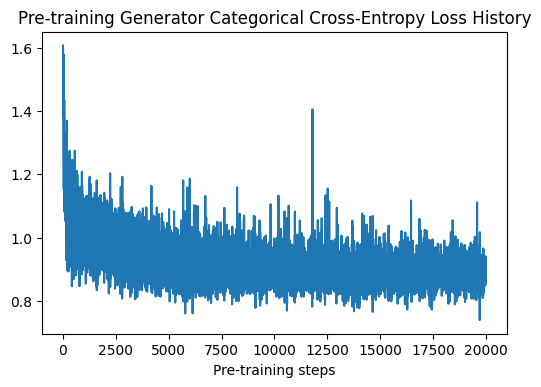

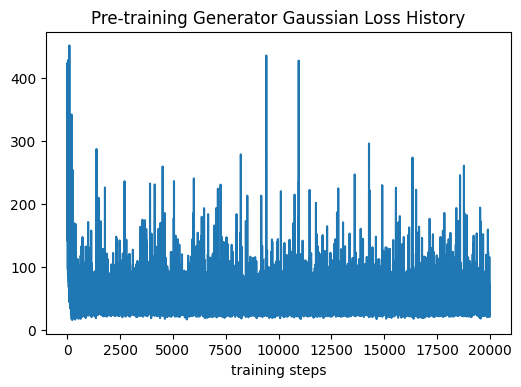

In [36]:
x = range(len(pretrain_gen_ce_loss_history))
plt.figure(dpi=100)
plt.plot(x, pretrain_gen_ce_loss_history)
plt.title('Pre-training Generator Categorical Cross-Entropy Loss History')
plt.xlabel('Pre-training steps')

x = range(len(pretrain_gen_gaussian_loss_history))
plt.figure(dpi=100)
plt.plot(x, pretrain_gen_gaussian_loss_history)
plt.title('Pre-training Generator Gaussian Loss History')
plt.xlabel('training steps')

In [ ]:
loss_save_dir = './experiment_results/without_normalization/init_pretrained/loss'
if not os.path.exists(loss_save_dir):
    os.makedirs(loss_save_dir)
    
with open(os.path.join(loss_save_dir, 'pretrain_gen_ce_loss_history.pickle'), 'wb') as f:
    pickle.dump(pretrain_gen_ce_loss_history, f)

with open(os.path.join(loss_save_dir, 'pretrain_gen_gaussian_loss_history.pickle'), 'wb') as f:
    pickle.dump(pretrain_gen_gaussian_loss_history, f)

### predict using pretrained G on self-regression

In [37]:
feature_sample, feature_label = list(pretrain_G_dataset.skip(11).take(1).as_numpy_iterator())[0]
feature_sample

(array([[[1.],
         [2.],
         [3.],
         [3.],
         [2.],
         [3.],
         [4.],
         [4.],
         [2.],
         [2.],
         [3.]]]),
 array([[[ 0.],
         [11.],
         [ 5.],
         [ 8.],
         [ 4.],
         [10.],
         [12.],
         [ 6.],
         [13.],
         [ 7.],
         [ 6.]]]))

In [38]:
self_regression_et, self_regression_ts, self_target_token, _ = create_self_regression_data_batch(feature_sample)
print(self_target_token.squeeze())

[2. 3. 3. 2. 3. 4. 4. 2. 2. 3.]


In [ ]:
self_regression_et[0]

In [ ]:
curr_state_et = self_regression_et[[0]]
curr_state_ts = self_regression_ts[[0]]

print(curr_state_et)
print(curr_state_ts)

In [ ]:
pred_token_prob, gaussian_log, mask, alpha, mu, sigma = pretrained_generator.predict((curr_state_et, curr_state_ts))
pred_token_prob.shape
print(pred_token_prob.argmax(axis=1))

### Save Pretrained G

In [ ]:
if not os.path.exists('./experiment_results/without_normalization/init_pretrained/pretrained_gen_weights'):
    os.makedirs('./experiment_results/without_normalization/init_pretrained/pretrained_gen_weights')
    
G_save_path = './experiment_results/without_normalization/init_pretrained/pretrained_gen_weights/model.tf'
pretrained_generator.save_weights(G_save_path)

In [ ]:
reload_pretrained_gen = build_G(
    T = T,
    event_vocab_dim = EVENT_VOCAB_DIM,
    emb_dim = EMB_DIM,
    hidden_dim= HIDDEN_DIM,
    k_mixt = K_MIST,
    return_sequence=False,
)

reload_pretrained_gen.build(input_shape=((BATCH_SIZE, T, 1), (BATCH_SIZE, T, 1)))
reload_pretrained_gen.load_weights(G_save_path)

In [ ]:
reload_pretrained_gen.summary()

## Pretrain D 

In [10]:
pretrain_D_et = np.concatenate([valid_event_type_seqs, invalid_event_type_seqs], axis=0)
pretrain_D_ts = np.concatenate([valid_timestamp_seqs, invalid_timestamp_seqs], axis=0)

pretrain_D_labels = np.concatenate([np.ones((valid_event_type_seqs.shape[0], 1)), 
                                  np.zeros((invalid_event_type_seqs.shape[0], 1))
                                 ], axis=0)
pretrain_D_features = (pretrain_D_et, pretrain_D_ts)
N_pretrain_D = pretrain_D_ts.shape[0]

In [11]:
WEIGHT_GAUSSIAN_LOSS = 1e-2
OPTIMIZER = Adam(lr=1e-3)

EPOCHS = 2
_TOTAL_STEPS = int(EPOCHS * N_pretrain_D / BATCH_SIZE)
# _TOTAL_STEPS = 1000

pretrain_disc_token_loss_history = []
pretrain_disc_gaussian_loss_history = []


pretrain_D_dataset = create_dataset(pretrain_D_features,
                                  pretrain_D_labels,
                                  batch_size=BATCH_SIZE,
                                  epochs=EPOCHS,
                                  buffer_size=N_pretrain_D)

pretrained_discriminator = build_D(
    T = T,
    event_vocab_dim = EVENT_VOCAB_DIM,
    emb_dim = EMB_DIM,
    hidden_dim= HIDDEN_DIM,
    k_mixt = K_MIST
)

No Normalization in D!
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4


In [12]:
_TOTAL_STEPS

1564

In [15]:
step = 0

for features_batch, real_labels in tqdm(pretrain_D_dataset.take(_TOTAL_STEPS)):
    step += 1
    print('Training Step:', step)
        
    disc_token_loss, disc_gaussian_loss = pretrain_discriminator(features_batch, real_labels, pretrained_discriminator, verbose=False, 
                                                                 weight_gaussian_loss=WEIGHT_GAUSSIAN_LOSS, optimizer=OPTIMIZER)
    pretrain_disc_token_loss_history.append(disc_token_loss.numpy())
    pretrain_disc_gaussian_loss_history.append(disc_gaussian_loss.numpy())

0it [00:00, ?it/s]

Training Step: 1


1it [00:00,  1.99it/s]

Training Step: 2


2it [00:00,  2.36it/s]

Training Step: 3


3it [00:00,  2.75it/s]

Training Step: 4


4it [00:01,  3.08it/s]

Training Step: 5


5it [00:01,  3.38it/s]

Training Step: 6


6it [00:01,  3.64it/s]

Training Step: 7


7it [00:01,  3.85it/s]

Training Step: 8


8it [00:02,  3.94it/s]

Training Step: 9


9it [00:02,  4.04it/s]

Training Step: 10


10it [00:02,  4.09it/s]

Training Step: 11


11it [00:02,  4.19it/s]

Training Step: 12


12it [00:03,  4.25it/s]

Training Step: 13


13it [00:03,  4.25it/s]

Training Step: 14


14it [00:03,  4.16it/s]

Training Step: 15


15it [00:03,  4.17it/s]

Training Step: 16


16it [00:04,  4.16it/s]

Training Step: 17


17it [00:04,  4.22it/s]

Training Step: 18


18it [00:04,  4.22it/s]

Training Step: 19


19it [00:04,  4.21it/s]

Training Step: 20


20it [00:04,  4.26it/s]

Training Step: 21


21it [00:05,  4.28it/s]

Training Step: 22


22it [00:05,  4.26it/s]

Training Step: 23


23it [00:05,  4.25it/s]

Training Step: 24


24it [00:05,  4.25it/s]

Training Step: 25


25it [00:06,  4.26it/s]

Training Step: 26


26it [00:06,  4.29it/s]

Training Step: 27


27it [00:06,  4.32it/s]

Training Step: 28


28it [00:06,  4.34it/s]

Training Step: 29


29it [00:07,  4.31it/s]

Training Step: 30


30it [00:07,  4.33it/s]

Training Step: 31


31it [00:07,  4.38it/s]

Training Step: 32


32it [00:07,  4.36it/s]

Training Step: 33


33it [00:07,  4.39it/s]

Training Step: 34


34it [00:08,  3.78it/s]

Training Step: 35


35it [00:08,  3.93it/s]

Training Step: 36


36it [00:08,  4.03it/s]

Training Step: 37


37it [00:08,  4.08it/s]

Training Step: 38


38it [00:09,  4.15it/s]

Training Step: 39


39it [00:09,  4.19it/s]

Training Step: 40


40it [00:09,  4.14it/s]

Training Step: 41


41it [00:09,  4.17it/s]

Training Step: 42


42it [00:10,  4.16it/s]

Training Step: 43


43it [00:10,  4.25it/s]

Training Step: 44


44it [00:10,  4.29it/s]

Training Step: 45


45it [00:10,  4.34it/s]

Training Step: 46


46it [00:11,  4.37it/s]

Training Step: 47


47it [00:11,  4.36it/s]

Training Step: 48


48it [00:11,  4.34it/s]

Training Step: 49


49it [00:11,  4.30it/s]

Training Step: 50


50it [00:12,  4.26it/s]

Training Step: 51


51it [00:12,  4.26it/s]

Training Step: 52


52it [00:12,  4.15it/s]

Training Step: 53


53it [00:12,  4.20it/s]

Training Step: 54


54it [00:12,  4.26it/s]

Training Step: 55


55it [00:13,  4.23it/s]

Training Step: 56


56it [00:13,  4.25it/s]

Training Step: 57


57it [00:13,  4.28it/s]

Training Step: 58


58it [00:13,  4.31it/s]

Training Step: 59


59it [00:14,  4.33it/s]

Training Step: 60


60it [00:14,  4.35it/s]

Training Step: 61


61it [00:14,  4.36it/s]

Training Step: 62


62it [00:14,  4.25it/s]

Training Step: 63


63it [00:15,  4.29it/s]

Training Step: 64


64it [00:15,  4.23it/s]

Training Step: 65


65it [00:15,  4.19it/s]

Training Step: 66


66it [00:15,  4.22it/s]

Training Step: 67


67it [00:16,  4.27it/s]

Training Step: 68


68it [00:16,  4.30it/s]

Training Step: 69


69it [00:16,  4.28it/s]

Training Step: 70


70it [00:16,  4.30it/s]

Training Step: 71


71it [00:16,  4.30it/s]

Training Step: 72


72it [00:17,  4.31it/s]

Training Step: 73


73it [00:17,  4.28it/s]

Training Step: 74


74it [00:17,  4.25it/s]

Training Step: 75


75it [00:17,  4.29it/s]

Training Step: 76


76it [00:18,  3.74it/s]

Training Step: 77


77it [00:18,  3.91it/s]

Training Step: 78


78it [00:18,  4.03it/s]

Training Step: 79


79it [00:18,  4.09it/s]

Training Step: 80


80it [00:19,  4.18it/s]

Training Step: 81


81it [00:19,  4.19it/s]

Training Step: 82


82it [00:19,  4.20it/s]

Training Step: 83


83it [00:19,  4.27it/s]

Training Step: 84


84it [00:20,  4.23it/s]

Training Step: 85


85it [00:20,  4.26it/s]

Training Step: 86


86it [00:20,  4.29it/s]

Training Step: 87


87it [00:20,  4.26it/s]

Training Step: 88


88it [00:21,  4.31it/s]

Training Step: 89


89it [00:21,  4.31it/s]

Training Step: 90


90it [00:21,  4.31it/s]

Training Step: 91


91it [00:21,  4.22it/s]

Training Step: 92


92it [00:21,  4.25it/s]

Training Step: 93


93it [00:22,  4.23it/s]

Training Step: 94


94it [00:22,  4.26it/s]

Training Step: 95


95it [00:22,  4.30it/s]

Training Step: 96


96it [00:22,  4.34it/s]

Training Step: 97


97it [00:23,  4.34it/s]

Training Step: 98


98it [00:23,  4.34it/s]

Training Step: 99


99it [00:23,  4.32it/s]

Training Step: 100


100it [00:23,  4.33it/s]

Training Step: 101


101it [00:24,  4.34it/s]

Training Step: 102


102it [00:24,  4.34it/s]

Training Step: 103


103it [00:24,  4.32it/s]

Training Step: 104


104it [00:24,  4.32it/s]

Training Step: 105


105it [00:24,  4.31it/s]

Training Step: 106


106it [00:25,  4.28it/s]

Training Step: 107


107it [00:25,  4.24it/s]

Training Step: 108


108it [00:25,  4.27it/s]

Training Step: 109


109it [00:25,  4.30it/s]

Training Step: 110


110it [00:26,  4.32it/s]

Training Step: 111


111it [00:26,  4.28it/s]

Training Step: 112


112it [00:26,  4.31it/s]

Training Step: 113


113it [00:26,  4.31it/s]

Training Step: 114


114it [00:27,  4.19it/s]

Training Step: 115


115it [00:27,  4.22it/s]

Training Step: 116


116it [00:27,  4.25it/s]

Training Step: 117


117it [00:27,  4.22it/s]

Training Step: 118


118it [00:28,  3.67it/s]

Training Step: 119


119it [00:28,  3.79it/s]

Training Step: 120


120it [00:28,  3.88it/s]

Training Step: 121


121it [00:28,  3.96it/s]

Training Step: 122


122it [00:29,  4.07it/s]

Training Step: 123


123it [00:29,  4.07it/s]

Training Step: 124


124it [00:29,  4.07it/s]

Training Step: 125


125it [00:29,  4.06it/s]

Training Step: 126


126it [00:30,  4.12it/s]

Training Step: 127


127it [00:30,  4.16it/s]

Training Step: 128


128it [00:30,  4.13it/s]

Training Step: 129


129it [00:30,  4.19it/s]

Training Step: 130


130it [00:31,  4.21it/s]

Training Step: 131


131it [00:31,  4.23it/s]

Training Step: 132


132it [00:31,  4.16it/s]

Training Step: 133


133it [00:31,  4.11it/s]

Training Step: 134


134it [00:31,  4.14it/s]

Training Step: 135


135it [00:32,  4.18it/s]

Training Step: 136


136it [00:32,  4.13it/s]

Training Step: 137


137it [00:32,  4.17it/s]

Training Step: 138


138it [00:32,  4.21it/s]

Training Step: 139


139it [00:33,  4.24it/s]

Training Step: 140


140it [00:33,  4.16it/s]

Training Step: 141


141it [00:33,  4.20it/s]

Training Step: 142


142it [00:33,  4.23it/s]

Training Step: 143


143it [00:34,  4.17it/s]

Training Step: 144


144it [00:34,  4.22it/s]

Training Step: 145


145it [00:34,  4.15it/s]

Training Step: 146


146it [00:34,  4.16it/s]

Training Step: 147


147it [00:35,  4.18it/s]

Training Step: 148


148it [00:35,  4.21it/s]

Training Step: 149


149it [00:35,  4.22it/s]

Training Step: 150


150it [00:35,  4.23it/s]

Training Step: 151


151it [00:36,  4.27it/s]

Training Step: 152


152it [00:36,  4.19it/s]

Training Step: 153


153it [00:36,  4.17it/s]

Training Step: 154


154it [00:36,  4.24it/s]

Training Step: 155


155it [00:36,  4.27it/s]

Training Step: 156


156it [00:37,  4.29it/s]

Training Step: 157


157it [00:37,  4.26it/s]

Training Step: 158


158it [00:37,  4.22it/s]

Training Step: 159


159it [00:37,  4.19it/s]

Training Step: 160


160it [00:38,  3.69it/s]

Training Step: 161


161it [00:38,  3.80it/s]

Training Step: 162


162it [00:38,  3.94it/s]

Training Step: 163


163it [00:38,  4.06it/s]

Training Step: 164


164it [00:39,  4.11it/s]

Training Step: 165


165it [00:39,  4.06it/s]

Training Step: 166


166it [00:39,  4.07it/s]

Training Step: 167


167it [00:39,  4.10it/s]

Training Step: 168


168it [00:40,  4.07it/s]

Training Step: 169


169it [00:40,  4.04it/s]

Training Step: 170


170it [00:40,  4.09it/s]

Training Step: 171


171it [00:40,  4.11it/s]

Training Step: 172


172it [00:41,  4.16it/s]

Training Step: 173


173it [00:41,  4.16it/s]

Training Step: 174


174it [00:41,  4.18it/s]

Training Step: 175


175it [00:41,  4.21it/s]

Training Step: 176


176it [00:42,  4.20it/s]

Training Step: 177


177it [00:42,  4.20it/s]

Training Step: 178


178it [00:42,  4.20it/s]

Training Step: 179


179it [00:42,  4.22it/s]

Training Step: 180


180it [00:43,  4.18it/s]

Training Step: 181


181it [00:43,  4.12it/s]

Training Step: 182


182it [00:43,  4.09it/s]

Training Step: 183


183it [00:43,  4.15it/s]

Training Step: 184


184it [00:44,  4.19it/s]

Training Step: 185


185it [00:44,  4.20it/s]

Training Step: 186


186it [00:44,  4.17it/s]

Training Step: 187


187it [00:44,  4.15it/s]

Training Step: 188


188it [00:44,  4.19it/s]

Training Step: 189


189it [00:45,  4.20it/s]

Training Step: 190


190it [00:45,  4.20it/s]

Training Step: 191


191it [00:45,  4.21it/s]

Training Step: 192


192it [00:45,  4.26it/s]

Training Step: 193


193it [00:46,  4.28it/s]

Training Step: 194


194it [00:46,  4.26it/s]

Training Step: 195


195it [00:46,  4.23it/s]

Training Step: 196


196it [00:46,  4.22it/s]

Training Step: 197


197it [00:47,  4.26it/s]

Training Step: 198


198it [00:47,  4.27it/s]

Training Step: 199


199it [00:47,  4.23it/s]

Training Step: 200


200it [00:47,  4.27it/s]

Training Step: 201


201it [00:48,  4.25it/s]

Training Step: 202


202it [00:48,  3.66it/s]

Training Step: 203


203it [00:48,  3.70it/s]

Training Step: 204


204it [00:48,  3.85it/s]

Training Step: 205


205it [00:49,  3.96it/s]

Training Step: 206


206it [00:49,  4.02it/s]

Training Step: 207


207it [00:49,  4.05it/s]

Training Step: 208


208it [00:49,  4.10it/s]

Training Step: 209


209it [00:50,  4.07it/s]

Training Step: 210


210it [00:50,  4.10it/s]

Training Step: 211


211it [00:50,  4.10it/s]

Training Step: 212


212it [00:50,  4.12it/s]

Training Step: 213


213it [00:51,  4.17it/s]

Training Step: 214


214it [00:51,  4.18it/s]

Training Step: 215


215it [00:51,  4.18it/s]

Training Step: 216


216it [00:51,  4.20it/s]

Training Step: 217


217it [00:52,  4.23it/s]

Training Step: 218


218it [00:52,  4.21it/s]

Training Step: 219


219it [00:52,  4.16it/s]

Training Step: 220


220it [00:52,  4.19it/s]

Training Step: 221


221it [00:52,  4.20it/s]

Training Step: 222


222it [00:53,  4.22it/s]

Training Step: 223


223it [00:53,  4.17it/s]

Training Step: 224


224it [00:53,  4.20it/s]

Training Step: 225


225it [00:53,  4.22it/s]

Training Step: 226


226it [00:54,  4.26it/s]

Training Step: 227


227it [00:54,  4.23it/s]

Training Step: 228


228it [00:54,  4.25it/s]

Training Step: 229


229it [00:54,  4.29it/s]

Training Step: 230


230it [00:55,  4.31it/s]

Training Step: 231


231it [00:55,  4.32it/s]

Training Step: 232


232it [00:55,  4.25it/s]

Training Step: 233


233it [00:55,  4.28it/s]

Training Step: 234


234it [00:56,  4.33it/s]

Training Step: 235


235it [00:56,  4.33it/s]

Training Step: 236


236it [00:56,  4.35it/s]

Training Step: 237


237it [00:56,  4.39it/s]

Training Step: 238


238it [00:56,  4.37it/s]

Training Step: 239


239it [00:57,  4.36it/s]

Training Step: 240


240it [00:57,  4.37it/s]

Training Step: 241


241it [00:57,  4.35it/s]

Training Step: 242


242it [00:57,  4.32it/s]

Training Step: 243


243it [00:58,  4.33it/s]

Training Step: 244


244it [00:58,  3.78it/s]

Training Step: 245


245it [00:58,  3.93it/s]

Training Step: 246


246it [00:58,  4.03it/s]

Training Step: 247


247it [00:59,  4.08it/s]

Training Step: 248


248it [00:59,  4.10it/s]

Training Step: 249


249it [00:59,  4.10it/s]

Training Step: 250


250it [00:59,  4.16it/s]

Training Step: 251


251it [01:00,  4.18it/s]

Training Step: 252


252it [01:00,  4.21it/s]

Training Step: 253


253it [01:00,  4.20it/s]

Training Step: 254


254it [01:00,  4.16it/s]

Training Step: 255


255it [01:01,  4.19it/s]

Training Step: 256


256it [01:01,  4.18it/s]

Training Step: 257


257it [01:01,  4.21it/s]

Training Step: 258


258it [01:01,  4.22it/s]

Training Step: 259


259it [01:01,  4.28it/s]

Training Step: 260


260it [01:02,  4.30it/s]

Training Step: 261


261it [01:02,  4.26it/s]

Training Step: 262


262it [01:02,  4.29it/s]

Training Step: 263


263it [01:02,  4.32it/s]

Training Step: 264


264it [01:03,  4.32it/s]

Training Step: 265


265it [01:03,  4.30it/s]

Training Step: 266


266it [01:03,  4.32it/s]

Training Step: 267


267it [01:03,  4.35it/s]

Training Step: 268


268it [01:04,  4.34it/s]

Training Step: 269


269it [01:04,  4.33it/s]

Training Step: 270


270it [01:04,  4.28it/s]

Training Step: 271


271it [01:04,  4.31it/s]

Training Step: 272


272it [01:04,  4.29it/s]

Training Step: 273


273it [01:05,  4.25it/s]

Training Step: 274


274it [01:05,  4.22it/s]

Training Step: 275


275it [01:05,  4.24it/s]

Training Step: 276


276it [01:05,  4.21it/s]

Training Step: 277


277it [01:06,  4.23it/s]

Training Step: 278


278it [01:06,  4.21it/s]

Training Step: 279


279it [01:06,  4.26it/s]

Training Step: 280


280it [01:06,  4.27it/s]

Training Step: 281


281it [01:07,  4.30it/s]

Training Step: 282


282it [01:07,  4.25it/s]

Training Step: 283


283it [01:07,  4.20it/s]

Training Step: 284


284it [01:07,  4.20it/s]

Training Step: 285


285it [01:08,  4.17it/s]

Training Step: 286


286it [01:08,  3.65it/s]

Training Step: 287


287it [01:08,  3.79it/s]

Training Step: 288


288it [01:08,  3.93it/s]

Training Step: 289


289it [01:09,  4.08it/s]

Training Step: 290


290it [01:09,  4.17it/s]

Training Step: 291


291it [01:09,  4.15it/s]

Training Step: 292


292it [01:09,  4.20it/s]

Training Step: 293


293it [01:10,  4.23it/s]

Training Step: 294


294it [01:10,  4.25it/s]

Training Step: 295


295it [01:10,  4.26it/s]

Training Step: 296


296it [01:10,  4.31it/s]

Training Step: 297


297it [01:10,  4.34it/s]

Training Step: 298


298it [01:11,  4.23it/s]

Training Step: 299


299it [01:11,  4.21it/s]

Training Step: 300


300it [01:11,  4.22it/s]

Training Step: 301


301it [01:11,  4.28it/s]

Training Step: 302


302it [01:12,  4.31it/s]

Training Step: 303


303it [01:12,  4.28it/s]

Training Step: 304


304it [01:12,  4.31it/s]

Training Step: 305


305it [01:12,  4.34it/s]

Training Step: 306


306it [01:13,  4.32it/s]

Training Step: 307


307it [01:13,  4.28it/s]

Training Step: 308


308it [01:13,  4.29it/s]

Training Step: 309


309it [01:13,  4.33it/s]

Training Step: 310


310it [01:14,  4.32it/s]

Training Step: 311


311it [01:14,  4.35it/s]

Training Step: 312


312it [01:14,  4.30it/s]

Training Step: 313


313it [01:14,  4.35it/s]

Training Step: 314


314it [01:14,  4.28it/s]

Training Step: 315


315it [01:15,  4.25it/s]

Training Step: 316


316it [01:15,  4.22it/s]

Training Step: 317


317it [01:15,  4.22it/s]

Training Step: 318


318it [01:15,  4.28it/s]

Training Step: 319


319it [01:16,  4.32it/s]

Training Step: 320


320it [01:16,  4.30it/s]

Training Step: 321


321it [01:16,  4.29it/s]

Training Step: 322


322it [01:16,  4.31it/s]

Training Step: 323


323it [01:17,  4.21it/s]

Training Step: 324


324it [01:17,  4.23it/s]

Training Step: 325


325it [01:17,  4.30it/s]

Training Step: 326


326it [01:17,  4.35it/s]

Training Step: 327


327it [01:17,  4.40it/s]

Training Step: 328


328it [01:18,  3.80it/s]

Training Step: 329


329it [01:18,  3.94it/s]

Training Step: 330


330it [01:18,  4.01it/s]

Training Step: 331


331it [01:19,  4.08it/s]

Training Step: 332


332it [01:19,  4.16it/s]

Training Step: 333


333it [01:19,  4.16it/s]

Training Step: 334


334it [01:19,  4.16it/s]

Training Step: 335


335it [01:19,  4.22it/s]

Training Step: 336


336it [01:20,  4.23it/s]

Training Step: 337


337it [01:20,  4.23it/s]

Training Step: 338


338it [01:20,  4.21it/s]

Training Step: 339


339it [01:20,  4.26it/s]

Training Step: 340


340it [01:21,  4.29it/s]

Training Step: 341


341it [01:21,  4.31it/s]

Training Step: 342


342it [01:21,  4.34it/s]

Training Step: 343


343it [01:21,  4.29it/s]

Training Step: 344


344it [01:22,  4.31it/s]

Training Step: 345


345it [01:22,  4.32it/s]

Training Step: 346


346it [01:22,  4.26it/s]

Training Step: 347


347it [01:22,  4.29it/s]

Training Step: 348


348it [01:22,  4.34it/s]

Training Step: 349


349it [01:23,  4.35it/s]

Training Step: 350


350it [01:23,  4.31it/s]

Training Step: 351


351it [01:23,  4.37it/s]

Training Step: 352


352it [01:23,  4.37it/s]

Training Step: 353


353it [01:24,  4.39it/s]

Training Step: 354


354it [01:24,  4.41it/s]

Training Step: 355


355it [01:24,  4.30it/s]

Training Step: 356


356it [01:24,  4.29it/s]

Training Step: 357


357it [01:25,  4.31it/s]

Training Step: 358


358it [01:25,  4.27it/s]

Training Step: 359


359it [01:25,  4.23it/s]

Training Step: 360


360it [01:25,  4.22it/s]

Training Step: 361


361it [01:26,  4.22it/s]

Training Step: 362


362it [01:26,  4.20it/s]

Training Step: 363


363it [01:26,  4.23it/s]

Training Step: 364


364it [01:26,  4.18it/s]

Training Step: 365


365it [01:26,  4.21it/s]

Training Step: 366


366it [01:27,  4.24it/s]

Training Step: 367


367it [01:27,  4.25it/s]

Training Step: 368


368it [01:27,  4.27it/s]

Training Step: 369


369it [01:27,  4.32it/s]

Training Step: 370


370it [01:28,  3.76it/s]

Training Step: 371


371it [01:28,  3.91it/s]

Training Step: 372


372it [01:28,  4.04it/s]

Training Step: 373


373it [01:28,  4.10it/s]

Training Step: 374


374it [01:29,  4.17it/s]

Training Step: 375


375it [01:29,  4.21it/s]

Training Step: 376


376it [01:29,  4.24it/s]

Training Step: 377


377it [01:29,  4.25it/s]

Training Step: 378


378it [01:30,  4.22it/s]

Training Step: 379


379it [01:30,  4.25it/s]

Training Step: 380


380it [01:30,  4.14it/s]

Training Step: 381


381it [01:30,  4.20it/s]

Training Step: 382


382it [01:31,  4.27it/s]

Training Step: 383


383it [01:31,  4.24it/s]

Training Step: 384


384it [01:31,  4.23it/s]

Training Step: 385


385it [01:31,  4.19it/s]

Training Step: 386


386it [01:31,  4.19it/s]

Training Step: 387


387it [01:32,  4.24it/s]

Training Step: 388


388it [01:32,  4.25it/s]

Training Step: 389


389it [01:32,  4.29it/s]

Training Step: 390


390it [01:32,  4.36it/s]

Training Step: 391


391it [01:33,  4.39it/s]

Training Step: 392


392it [01:33,  4.38it/s]

Training Step: 393


393it [01:33,  4.35it/s]

Training Step: 394


394it [01:33,  4.32it/s]

Training Step: 395


395it [01:34,  4.28it/s]

Training Step: 396


396it [01:34,  4.31it/s]

Training Step: 397


397it [01:34,  4.30it/s]

Training Step: 398


398it [01:34,  4.32it/s]

Training Step: 399


399it [01:34,  4.36it/s]

Training Step: 400


400it [01:35,  4.36it/s]

Training Step: 401


401it [01:35,  4.30it/s]

Training Step: 402


402it [01:35,  4.29it/s]

Training Step: 403


403it [01:35,  4.32it/s]

Training Step: 404


404it [01:36,  4.26it/s]

Training Step: 405


405it [01:36,  4.25it/s]

Training Step: 406


406it [01:36,  4.27it/s]

Training Step: 407


407it [01:36,  4.25it/s]

Training Step: 408


408it [01:37,  4.21it/s]

Training Step: 409


409it [01:37,  4.14it/s]

Training Step: 410


410it [01:37,  4.14it/s]

Training Step: 411


411it [01:37,  4.18it/s]

Training Step: 412


412it [01:38,  3.65it/s]

Training Step: 413


413it [01:38,  3.77it/s]

Training Step: 414


414it [01:38,  3.91it/s]

Training Step: 415


415it [01:38,  4.03it/s]

Training Step: 416


416it [01:39,  4.02it/s]

Training Step: 417


417it [01:39,  4.08it/s]

Training Step: 418


418it [01:39,  4.14it/s]

Training Step: 419


419it [01:39,  4.17it/s]

Training Step: 420


420it [01:40,  4.19it/s]

Training Step: 421


421it [01:40,  4.18it/s]

Training Step: 422


422it [01:40,  4.14it/s]

Training Step: 423


423it [01:40,  4.19it/s]

Training Step: 424


424it [01:41,  4.25it/s]

Training Step: 425


425it [01:41,  4.23it/s]

Training Step: 426


426it [01:41,  4.24it/s]

Training Step: 427


427it [01:41,  4.19it/s]

Training Step: 428


428it [01:41,  4.21it/s]

Training Step: 429


429it [01:42,  4.27it/s]

Training Step: 430


430it [01:42,  4.25it/s]

Training Step: 431


431it [01:42,  4.29it/s]

Training Step: 432


432it [01:42,  4.33it/s]

Training Step: 433


433it [01:43,  4.34it/s]

Training Step: 434


434it [01:43,  4.26it/s]

Training Step: 435


435it [01:43,  4.29it/s]

Training Step: 436


436it [01:43,  4.27it/s]

Training Step: 437


437it [01:44,  4.29it/s]

Training Step: 438


438it [01:44,  4.30it/s]

Training Step: 439


439it [01:44,  4.24it/s]

Training Step: 440


440it [01:44,  4.25it/s]

Training Step: 441


441it [01:45,  4.26it/s]

Training Step: 442


442it [01:45,  4.26it/s]

Training Step: 443


443it [01:45,  4.18it/s]

Training Step: 444


444it [01:45,  4.23it/s]

Training Step: 445


445it [01:45,  4.26it/s]

Training Step: 446


446it [01:46,  4.17it/s]

Training Step: 447


447it [01:46,  4.15it/s]

Training Step: 448


448it [01:46,  4.18it/s]

Training Step: 449


449it [01:46,  4.24it/s]

Training Step: 450


450it [01:47,  4.21it/s]

Training Step: 451


451it [01:47,  4.19it/s]

Training Step: 452


452it [01:47,  4.16it/s]

Training Step: 453


453it [01:47,  4.20it/s]

Training Step: 454


454it [01:48,  3.67it/s]

Training Step: 455


455it [01:48,  3.78it/s]

Training Step: 456


456it [01:48,  3.91it/s]

Training Step: 457


457it [01:48,  4.05it/s]

Training Step: 458


458it [01:49,  4.13it/s]

Training Step: 459


459it [01:49,  4.19it/s]

Training Step: 460


460it [01:49,  4.21it/s]

Training Step: 461


461it [01:49,  4.25it/s]

Training Step: 462


462it [01:50,  4.30it/s]

Training Step: 463


463it [01:50,  4.32it/s]

Training Step: 464


464it [01:50,  4.31it/s]

Training Step: 465


465it [01:50,  4.34it/s]

Training Step: 466


466it [01:51,  4.37it/s]

Training Step: 467


467it [01:51,  4.34it/s]

Training Step: 468


468it [01:51,  4.31it/s]

Training Step: 469


469it [01:51,  4.30it/s]

Training Step: 470


470it [01:51,  4.34it/s]

Training Step: 471


471it [01:52,  4.35it/s]

Training Step: 472


472it [01:52,  4.31it/s]

Training Step: 473


473it [01:52,  4.16it/s]

Training Step: 474


474it [01:52,  4.20it/s]

Training Step: 475


475it [01:53,  4.24it/s]

Training Step: 476


476it [01:53,  4.23it/s]

Training Step: 477


477it [01:53,  4.27it/s]

Training Step: 478


478it [01:53,  4.30it/s]

Training Step: 479


479it [01:54,  4.32it/s]

Training Step: 480


480it [01:54,  4.30it/s]

Training Step: 481


481it [01:54,  4.28it/s]

Training Step: 482


482it [01:54,  4.27it/s]

Training Step: 483


483it [01:54,  4.23it/s]

Training Step: 484


484it [01:55,  4.25it/s]

Training Step: 485


485it [01:55,  4.27it/s]

Training Step: 486


486it [01:55,  4.19it/s]

Training Step: 487


487it [01:55,  4.28it/s]

Training Step: 488


488it [01:56,  4.30it/s]

Training Step: 489


489it [01:56,  4.21it/s]

Training Step: 490


490it [01:56,  4.26it/s]

Training Step: 491


491it [01:56,  4.29it/s]

Training Step: 492


492it [01:57,  4.30it/s]

Training Step: 493


493it [01:57,  4.30it/s]

Training Step: 494


494it [01:57,  4.33it/s]

Training Step: 495


495it [01:57,  4.27it/s]

Training Step: 496


496it [01:58,  3.71it/s]

Training Step: 497


497it [01:58,  3.89it/s]

Training Step: 498


498it [01:58,  3.96it/s]

Training Step: 499


499it [01:58,  4.09it/s]

Training Step: 500


500it [01:59,  4.19it/s]

Training Step: 501


501it [01:59,  4.22it/s]

Training Step: 502


502it [01:59,  4.26it/s]

Training Step: 503


503it [01:59,  4.28it/s]

Training Step: 504


504it [02:00,  4.26it/s]

Training Step: 505


505it [02:00,  4.28it/s]

Training Step: 506


506it [02:00,  4.24it/s]

Training Step: 507


507it [02:00,  4.23it/s]

Training Step: 508


508it [02:00,  4.17it/s]

Training Step: 509


509it [02:01,  4.20it/s]

Training Step: 510


510it [02:01,  4.26it/s]

Training Step: 511


511it [02:01,  4.31it/s]

Training Step: 512


512it [02:01,  4.34it/s]

Training Step: 513


513it [02:02,  4.36it/s]

Training Step: 514


514it [02:02,  4.38it/s]

Training Step: 515


515it [02:02,  4.33it/s]

Training Step: 516


516it [02:02,  4.29it/s]

Training Step: 517


517it [02:03,  4.30it/s]

Training Step: 518


518it [02:03,  4.31it/s]

Training Step: 519


519it [02:03,  4.30it/s]

Training Step: 520


520it [02:03,  4.32it/s]

Training Step: 521


521it [02:03,  4.33it/s]

Training Step: 522


522it [02:04,  4.28it/s]

Training Step: 523


523it [02:04,  4.19it/s]

Training Step: 524


524it [02:04,  4.22it/s]

Training Step: 525


525it [02:04,  4.24it/s]

Training Step: 526


526it [02:05,  4.23it/s]

Training Step: 527


527it [02:05,  4.26it/s]

Training Step: 528


528it [02:05,  4.29it/s]

Training Step: 529


529it [02:05,  4.30it/s]

Training Step: 530


530it [02:06,  4.31it/s]

Training Step: 531


531it [02:06,  4.29it/s]

Training Step: 532


532it [02:06,  4.27it/s]

Training Step: 533


533it [02:06,  4.28it/s]

Training Step: 534


534it [02:07,  4.32it/s]

Training Step: 535


535it [02:07,  4.29it/s]

Training Step: 536


536it [02:07,  4.31it/s]

Training Step: 537


537it [02:07,  4.34it/s]

Training Step: 538


538it [02:08,  3.69it/s]

Training Step: 539


539it [02:08,  3.87it/s]

Training Step: 540


540it [02:08,  3.98it/s]

Training Step: 541


541it [02:08,  4.09it/s]

Training Step: 542


542it [02:08,  4.14it/s]

Training Step: 543


543it [02:09,  4.19it/s]

Training Step: 544


544it [02:09,  4.23it/s]

Training Step: 545


545it [02:09,  4.25it/s]

Training Step: 546


546it [02:09,  4.25it/s]

Training Step: 547


547it [02:10,  4.23it/s]

Training Step: 548


548it [02:10,  4.25it/s]

Training Step: 549


549it [02:10,  4.28it/s]

Training Step: 550


550it [02:10,  4.30it/s]

Training Step: 551


551it [02:11,  4.33it/s]

Training Step: 552


552it [02:11,  4.32it/s]

Training Step: 553


553it [02:11,  4.30it/s]

Training Step: 554


554it [02:11,  4.30it/s]

Training Step: 555


555it [02:12,  4.37it/s]

Training Step: 556


556it [02:12,  4.31it/s]

Training Step: 557


557it [02:12,  4.32it/s]

Training Step: 558


558it [02:12,  4.31it/s]

Training Step: 559


559it [02:12,  4.36it/s]

Training Step: 560


560it [02:13,  4.40it/s]

Training Step: 561


561it [02:13,  4.35it/s]

Training Step: 562


562it [02:13,  4.36it/s]

Training Step: 563


563it [02:13,  4.35it/s]

Training Step: 564


564it [02:14,  4.37it/s]

Training Step: 565


565it [02:14,  4.37it/s]

Training Step: 566


566it [02:14,  4.31it/s]

Training Step: 567


567it [02:14,  4.35it/s]

Training Step: 568


568it [02:14,  4.36it/s]

Training Step: 569


569it [02:15,  4.38it/s]

Training Step: 570


570it [02:15,  4.38it/s]

Training Step: 571


571it [02:15,  4.38it/s]

Training Step: 572


572it [02:15,  4.40it/s]

Training Step: 573


573it [02:16,  4.39it/s]

Training Step: 574


574it [02:16,  4.35it/s]

Training Step: 575


575it [02:16,  4.35it/s]

Training Step: 576


576it [02:16,  4.35it/s]

Training Step: 577


577it [02:17,  4.33it/s]

Training Step: 578


578it [02:17,  4.31it/s]

Training Step: 579


579it [02:17,  4.23it/s]

Training Step: 580


580it [02:17,  3.71it/s]

Training Step: 581


581it [02:18,  3.87it/s]

Training Step: 582


582it [02:18,  3.94it/s]

Training Step: 583


583it [02:18,  3.99it/s]

Training Step: 584


584it [02:18,  3.99it/s]

Training Step: 585


585it [02:19,  3.94it/s]

Training Step: 586


586it [02:19,  3.83it/s]

Training Step: 587


587it [02:19,  3.83it/s]

Training Step: 588


588it [02:19,  3.80it/s]

Training Step: 589


589it [02:20,  3.83it/s]

Training Step: 590


590it [02:20,  3.78it/s]

Training Step: 591


591it [02:20,  3.79it/s]

Training Step: 592


592it [02:20,  3.79it/s]

Training Step: 593


593it [02:21,  3.77it/s]

Training Step: 594


594it [02:21,  3.74it/s]

Training Step: 595


595it [02:21,  3.77it/s]

Training Step: 596


596it [02:22,  3.78it/s]

Training Step: 597


597it [02:22,  3.77it/s]

Training Step: 598


598it [02:22,  3.77it/s]

Training Step: 599


599it [02:22,  3.79it/s]

Training Step: 600


600it [02:23,  3.78it/s]

Training Step: 601


601it [02:23,  3.74it/s]

Training Step: 602


602it [02:23,  3.73it/s]

Training Step: 603


603it [02:23,  3.73it/s]

Training Step: 604


604it [02:24,  3.76it/s]

Training Step: 605


605it [02:24,  3.76it/s]

Training Step: 606


606it [02:24,  3.86it/s]

Training Step: 607


607it [02:24,  4.01it/s]

Training Step: 608


608it [02:25,  4.10it/s]

Training Step: 609


609it [02:25,  4.13it/s]

Training Step: 610


610it [02:25,  4.18it/s]

Training Step: 611


611it [02:25,  4.24it/s]

Training Step: 612


612it [02:26,  4.30it/s]

Training Step: 613


613it [02:26,  4.24it/s]

Training Step: 614


614it [02:26,  4.26it/s]

Training Step: 615


615it [02:26,  4.14it/s]

Training Step: 616


616it [02:27,  4.11it/s]

Training Step: 617


617it [02:27,  4.19it/s]

Training Step: 618


618it [02:27,  4.18it/s]

Training Step: 619


619it [02:27,  4.24it/s]

Training Step: 620


620it [02:27,  4.29it/s]

Training Step: 621


621it [02:28,  4.35it/s]

Training Step: 622


622it [02:28,  3.78it/s]

Training Step: 623


623it [02:28,  3.89it/s]

Training Step: 624


624it [02:29,  4.03it/s]

Training Step: 625


625it [02:29,  4.12it/s]

Training Step: 626


626it [02:29,  4.15it/s]

Training Step: 627


627it [02:29,  4.23it/s]

Training Step: 628


628it [02:29,  4.29it/s]

Training Step: 629


629it [02:30,  4.30it/s]

Training Step: 630


630it [02:30,  4.19it/s]

Training Step: 631


631it [02:30,  4.17it/s]

Training Step: 632


632it [02:30,  4.23it/s]

Training Step: 633


633it [02:31,  4.28it/s]

Training Step: 634


634it [02:31,  4.24it/s]

Training Step: 635


635it [02:31,  4.28it/s]

Training Step: 636


636it [02:31,  4.23it/s]

Training Step: 637


637it [02:32,  4.29it/s]

Training Step: 638


638it [02:32,  4.29it/s]

Training Step: 639


639it [02:32,  4.33it/s]

Training Step: 640


640it [02:32,  4.35it/s]

Training Step: 641


641it [02:32,  4.36it/s]

Training Step: 642


642it [02:33,  4.32it/s]

Training Step: 643


643it [02:33,  4.32it/s]

Training Step: 644


644it [02:33,  4.33it/s]

Training Step: 645


645it [02:33,  4.27it/s]

Training Step: 646


646it [02:34,  4.31it/s]

Training Step: 647


647it [02:34,  4.29it/s]

Training Step: 648


648it [02:34,  4.33it/s]

Training Step: 649


649it [02:34,  4.32it/s]

Training Step: 650


650it [02:35,  4.35it/s]

Training Step: 651


651it [02:35,  4.35it/s]

Training Step: 652


652it [02:35,  4.33it/s]

Training Step: 653


653it [02:35,  4.35it/s]

Training Step: 654


654it [02:35,  4.38it/s]

Training Step: 655


655it [02:36,  4.41it/s]

Training Step: 656


656it [02:36,  4.32it/s]

Training Step: 657


657it [02:36,  4.30it/s]

Training Step: 658


658it [02:36,  4.35it/s]

Training Step: 659


659it [02:37,  4.37it/s]

Training Step: 660


660it [02:37,  4.38it/s]

Training Step: 661


661it [02:37,  4.36it/s]

Training Step: 662


662it [02:37,  4.38it/s]

Training Step: 663


663it [02:38,  4.39it/s]

Training Step: 664


664it [02:38,  3.77it/s]

Training Step: 665


665it [02:38,  3.82it/s]

Training Step: 666


666it [02:38,  3.96it/s]

Training Step: 667


667it [02:39,  4.01it/s]

Training Step: 668


668it [02:39,  4.11it/s]

Training Step: 669


669it [02:39,  4.13it/s]

Training Step: 670


670it [02:39,  4.19it/s]

Training Step: 671


671it [02:40,  4.17it/s]

Training Step: 672


672it [02:40,  4.17it/s]

Training Step: 673


673it [02:40,  4.23it/s]

Training Step: 674


674it [02:40,  4.28it/s]

Training Step: 675


675it [02:40,  4.35it/s]

Training Step: 676


676it [02:41,  4.29it/s]

Training Step: 677


677it [02:41,  4.26it/s]

Training Step: 678


678it [02:41,  4.32it/s]

Training Step: 679


679it [02:41,  4.32it/s]

Training Step: 680


680it [02:42,  4.29it/s]

Training Step: 681


681it [02:42,  4.29it/s]

Training Step: 682


682it [02:42,  4.30it/s]

Training Step: 683


683it [02:42,  4.35it/s]

Training Step: 684


684it [02:43,  4.30it/s]

Training Step: 685


685it [02:43,  4.23it/s]

Training Step: 686


686it [02:43,  4.19it/s]

Training Step: 687


687it [02:43,  4.21it/s]

Training Step: 688


688it [02:44,  4.28it/s]

Training Step: 689


689it [02:44,  4.28it/s]

Training Step: 690


690it [02:44,  4.20it/s]

Training Step: 691


691it [02:44,  4.26it/s]

Training Step: 692


692it [02:44,  4.23it/s]

Training Step: 693


693it [02:45,  4.27it/s]

Training Step: 694


694it [02:45,  4.28it/s]

Training Step: 695


695it [02:45,  4.29it/s]

Training Step: 696


696it [02:45,  4.30it/s]

Training Step: 697


697it [02:46,  4.31it/s]

Training Step: 698


698it [02:46,  4.27it/s]

Training Step: 699


699it [02:46,  4.30it/s]

Training Step: 700


700it [02:46,  4.28it/s]

Training Step: 701


701it [02:47,  4.29it/s]

Training Step: 702


702it [02:47,  4.31it/s]

Training Step: 703


703it [02:47,  4.27it/s]

Training Step: 704


704it [02:47,  4.31it/s]

Training Step: 705


705it [02:47,  4.36it/s]

Training Step: 706


706it [02:48,  3.71it/s]

Training Step: 707


707it [02:48,  3.90it/s]

Training Step: 708


708it [02:48,  4.03it/s]

Training Step: 709


709it [02:49,  4.14it/s]

Training Step: 710


710it [02:49,  4.09it/s]

Training Step: 711


711it [02:49,  4.13it/s]

Training Step: 712


712it [02:49,  4.23it/s]

Training Step: 713


713it [02:49,  4.28it/s]

Training Step: 714


714it [02:50,  4.32it/s]

Training Step: 715


715it [02:50,  4.21it/s]

Training Step: 716


716it [02:50,  4.27it/s]

Training Step: 717


717it [02:50,  4.31it/s]

Training Step: 718


718it [02:51,  4.30it/s]

Training Step: 719


719it [02:51,  4.30it/s]

Training Step: 720


720it [02:51,  4.32it/s]

Training Step: 721


721it [02:51,  4.35it/s]

Training Step: 722


722it [02:52,  4.36it/s]

Training Step: 723


723it [02:52,  4.36it/s]

Training Step: 724


724it [02:52,  4.25it/s]

Training Step: 725


725it [02:52,  4.31it/s]

Training Step: 726


726it [02:52,  4.35it/s]

Training Step: 727


727it [02:53,  4.41it/s]

Training Step: 728


728it [02:53,  4.36it/s]

Training Step: 729


729it [02:53,  4.28it/s]

Training Step: 730


730it [02:53,  4.29it/s]

Training Step: 731


731it [02:54,  4.33it/s]

Training Step: 732


732it [02:54,  4.32it/s]

Training Step: 733


733it [02:54,  4.36it/s]

Training Step: 734


734it [02:54,  4.37it/s]

Training Step: 735


735it [02:55,  4.33it/s]

Training Step: 736


736it [02:55,  4.32it/s]

Training Step: 737


737it [02:55,  4.32it/s]

Training Step: 738


738it [02:55,  4.24it/s]

Training Step: 739


739it [02:55,  4.32it/s]

Training Step: 740


740it [02:56,  4.33it/s]

Training Step: 741


741it [02:56,  4.28it/s]

Training Step: 742


742it [02:56,  4.27it/s]

Training Step: 743


743it [02:56,  4.27it/s]

Training Step: 744


744it [02:57,  4.24it/s]

Training Step: 745


745it [02:57,  4.27it/s]

Training Step: 746


746it [02:57,  4.31it/s]

Training Step: 747


747it [02:57,  4.33it/s]

Training Step: 748


748it [02:58,  3.77it/s]

Training Step: 749


749it [02:58,  3.84it/s]

Training Step: 750


750it [02:58,  3.99it/s]

Training Step: 751


751it [02:58,  4.03it/s]

Training Step: 752


752it [02:59,  4.12it/s]

Training Step: 753


753it [02:59,  4.20it/s]

Training Step: 754


754it [02:59,  4.24it/s]

Training Step: 755


755it [02:59,  4.22it/s]

Training Step: 756


756it [03:00,  4.27it/s]

Training Step: 757


757it [03:00,  4.27it/s]

Training Step: 758


758it [03:00,  4.26it/s]

Training Step: 759


759it [03:00,  4.24it/s]

Training Step: 760


760it [03:00,  4.25it/s]

Training Step: 761


761it [03:01,  4.29it/s]

Training Step: 762


762it [03:01,  4.26it/s]

Training Step: 763


763it [03:01,  4.26it/s]

Training Step: 764


764it [03:01,  4.25it/s]

Training Step: 765


765it [03:02,  4.26it/s]

Training Step: 766


766it [03:02,  4.25it/s]

Training Step: 767


767it [03:02,  4.27it/s]

Training Step: 768


768it [03:02,  4.27it/s]

Training Step: 769


769it [03:03,  4.27it/s]

Training Step: 770


770it [03:03,  4.23it/s]

Training Step: 771


771it [03:03,  4.27it/s]

Training Step: 772


772it [03:03,  4.25it/s]

Training Step: 773


773it [03:04,  4.26it/s]

Training Step: 774


774it [03:04,  4.28it/s]

Training Step: 775


775it [03:04,  4.29it/s]

Training Step: 776


776it [03:04,  4.33it/s]

Training Step: 777


777it [03:04,  4.37it/s]

Training Step: 778


778it [03:05,  4.39it/s]

Training Step: 779


779it [03:05,  4.37it/s]

Training Step: 780


780it [03:05,  4.37it/s]

Training Step: 781


781it [03:05,  4.36it/s]

Training Step: 782


782it [03:06,  4.38it/s]

Training Step: 783


783it [03:06,  3.28it/s]

Training Step: 784


784it [03:06,  3.56it/s]

Training Step: 785


785it [03:07,  3.79it/s]

Training Step: 786


786it [03:07,  3.89it/s]

Training Step: 787


787it [03:07,  4.02it/s]

Training Step: 788


788it [03:07,  4.14it/s]

Training Step: 789


789it [03:07,  4.20it/s]

Training Step: 790


790it [03:08,  3.69it/s]

Training Step: 791


791it [03:08,  3.89it/s]

Training Step: 792


792it [03:08,  4.04it/s]

Training Step: 793


793it [03:08,  4.20it/s]

Training Step: 794


794it [03:09,  4.27it/s]

Training Step: 795


795it [03:09,  4.27it/s]

Training Step: 796


796it [03:09,  4.32it/s]

Training Step: 797


797it [03:09,  4.32it/s]

Training Step: 798


798it [03:10,  4.31it/s]

Training Step: 799


799it [03:10,  4.29it/s]

Training Step: 800


800it [03:10,  4.32it/s]

Training Step: 801


801it [03:10,  4.34it/s]

Training Step: 802


802it [03:11,  4.37it/s]

Training Step: 803


803it [03:11,  4.39it/s]

Training Step: 804


804it [03:11,  4.39it/s]

Training Step: 805


805it [03:11,  4.34it/s]

Training Step: 806


806it [03:11,  4.37it/s]

Training Step: 807


807it [03:12,  4.37it/s]

Training Step: 808


808it [03:12,  4.34it/s]

Training Step: 809


809it [03:12,  4.35it/s]

Training Step: 810


810it [03:12,  4.35it/s]

Training Step: 811


811it [03:13,  4.36it/s]

Training Step: 812


812it [03:13,  4.25it/s]

Training Step: 813


813it [03:13,  4.28it/s]

Training Step: 814


814it [03:13,  4.27it/s]

Training Step: 815


815it [03:14,  4.30it/s]

Training Step: 816


816it [03:14,  4.31it/s]

Training Step: 817


817it [03:14,  4.33it/s]

Training Step: 818


818it [03:14,  4.33it/s]

Training Step: 819


819it [03:14,  4.21it/s]

Training Step: 820


820it [03:15,  4.23it/s]

Training Step: 821


821it [03:15,  4.28it/s]

Training Step: 822


822it [03:15,  4.27it/s]

Training Step: 823


823it [03:15,  4.34it/s]

Training Step: 824


824it [03:16,  4.31it/s]

Training Step: 825


825it [03:16,  4.33it/s]

Training Step: 826


826it [03:16,  4.29it/s]

Training Step: 827


827it [03:16,  4.30it/s]

Training Step: 828


828it [03:17,  4.31it/s]

Training Step: 829


829it [03:17,  4.26it/s]

Training Step: 830


830it [03:17,  4.28it/s]

Training Step: 831


831it [03:17,  4.31it/s]

Training Step: 832


832it [03:18,  3.71it/s]

Training Step: 833


833it [03:18,  3.87it/s]

Training Step: 834


834it [03:18,  4.01it/s]

Training Step: 835


835it [03:18,  4.09it/s]

Training Step: 836


836it [03:19,  4.18it/s]

Training Step: 837


837it [03:19,  4.13it/s]

Training Step: 838


838it [03:19,  4.17it/s]

Training Step: 839


839it [03:19,  4.21it/s]

Training Step: 840


840it [03:19,  4.24it/s]

Training Step: 841


841it [03:20,  4.27it/s]

Training Step: 842


842it [03:20,  4.16it/s]

Training Step: 843


843it [03:20,  4.17it/s]

Training Step: 844


844it [03:20,  4.19it/s]

Training Step: 845


845it [03:21,  4.24it/s]

Training Step: 846


846it [03:21,  4.24it/s]

Training Step: 847


847it [03:21,  4.26it/s]

Training Step: 848


848it [03:21,  4.30it/s]

Training Step: 849


849it [03:22,  4.31it/s]

Training Step: 850


850it [03:22,  4.28it/s]

Training Step: 851


851it [03:22,  4.29it/s]

Training Step: 852


852it [03:22,  4.31it/s]

Training Step: 853


853it [03:23,  4.31it/s]

Training Step: 854


854it [03:23,  4.30it/s]

Training Step: 855


855it [03:23,  4.26it/s]

Training Step: 856


856it [03:23,  4.27it/s]

Training Step: 857


857it [03:24,  4.16it/s]

Training Step: 858


858it [03:24,  4.21it/s]

Training Step: 859


859it [03:24,  4.08it/s]

Training Step: 860


860it [03:24,  4.08it/s]

Training Step: 861


861it [03:24,  4.12it/s]

Training Step: 862


862it [03:25,  4.13it/s]

Training Step: 863


863it [03:25,  4.15it/s]

Training Step: 864


864it [03:25,  4.17it/s]

Training Step: 865


865it [03:25,  4.15it/s]

Training Step: 866


866it [03:26,  4.14it/s]

Training Step: 867


867it [03:26,  4.14it/s]

Training Step: 868


868it [03:26,  4.16it/s]

Training Step: 869


869it [03:26,  4.18it/s]

Training Step: 870


870it [03:27,  4.17it/s]

Training Step: 871


871it [03:27,  4.15it/s]

Training Step: 872


872it [03:27,  4.18it/s]

Training Step: 873


873it [03:27,  4.19it/s]

Training Step: 874


874it [03:28,  3.69it/s]

Training Step: 875


875it [03:28,  3.76it/s]

Training Step: 876


876it [03:28,  3.87it/s]

Training Step: 877


877it [03:28,  4.01it/s]

Training Step: 878


878it [03:29,  4.13it/s]

Training Step: 879


879it [03:29,  4.12it/s]

Training Step: 880


880it [03:29,  4.07it/s]

Training Step: 881


881it [03:29,  4.12it/s]

Training Step: 882


882it [03:30,  4.18it/s]

Training Step: 883


883it [03:30,  4.12it/s]

Training Step: 884


884it [03:30,  4.16it/s]

Training Step: 885


885it [03:30,  4.18it/s]

Training Step: 886


886it [03:31,  4.18it/s]

Training Step: 887


887it [03:31,  4.18it/s]

Training Step: 888


888it [03:31,  4.20it/s]

Training Step: 889


889it [03:31,  4.17it/s]

Training Step: 890


890it [03:32,  4.15it/s]

Training Step: 891


891it [03:32,  4.11it/s]

Training Step: 892


892it [03:32,  4.13it/s]

Training Step: 893


893it [03:32,  4.16it/s]

Training Step: 894


894it [03:33,  4.14it/s]

Training Step: 895


895it [03:33,  4.15it/s]

Training Step: 896


896it [03:33,  4.17it/s]

Training Step: 897


897it [03:33,  4.14it/s]

Training Step: 898


898it [03:33,  4.18it/s]

Training Step: 899


899it [03:34,  4.18it/s]

Training Step: 900


900it [03:34,  4.16it/s]

Training Step: 901


901it [03:34,  4.14it/s]

Training Step: 902


902it [03:34,  4.22it/s]

Training Step: 903


903it [03:35,  4.21it/s]

Training Step: 904


904it [03:35,  4.15it/s]

Training Step: 905


905it [03:35,  4.18it/s]

Training Step: 906


906it [03:35,  4.20it/s]

Training Step: 907


907it [03:36,  4.17it/s]

Training Step: 908


908it [03:36,  4.17it/s]

Training Step: 909


909it [03:36,  4.21it/s]

Training Step: 910


910it [03:36,  4.15it/s]

Training Step: 911


911it [03:37,  4.17it/s]

Training Step: 912


912it [03:37,  4.14it/s]

Training Step: 913


913it [03:37,  4.19it/s]

Training Step: 914


914it [03:37,  4.18it/s]

Training Step: 915


915it [03:38,  4.24it/s]

Training Step: 916


916it [03:38,  3.69it/s]

Training Step: 917


917it [03:38,  3.85it/s]

Training Step: 918


918it [03:38,  3.96it/s]

Training Step: 919


919it [03:39,  4.06it/s]

Training Step: 920


920it [03:39,  4.11it/s]

Training Step: 921


921it [03:39,  4.16it/s]

Training Step: 922


922it [03:39,  4.21it/s]

Training Step: 923


923it [03:40,  4.19it/s]

Training Step: 924


924it [03:40,  4.23it/s]

Training Step: 925


925it [03:40,  4.13it/s]

Training Step: 926


926it [03:40,  4.19it/s]

Training Step: 927


927it [03:40,  4.26it/s]

Training Step: 928


928it [03:41,  4.26it/s]

Training Step: 929


929it [03:41,  4.25it/s]

Training Step: 930


930it [03:41,  4.27it/s]

Training Step: 931


931it [03:41,  4.21it/s]

Training Step: 932


932it [03:42,  4.24it/s]

Training Step: 933


933it [03:42,  4.17it/s]

Training Step: 934


934it [03:42,  4.20it/s]

Training Step: 935


935it [03:42,  4.23it/s]

Training Step: 936


936it [03:43,  4.21it/s]

Training Step: 937


937it [03:43,  4.17it/s]

Training Step: 938


938it [03:43,  4.17it/s]

Training Step: 939


939it [03:43,  4.18it/s]

Training Step: 940


940it [03:44,  4.14it/s]

Training Step: 941


941it [03:44,  4.07it/s]

Training Step: 942


942it [03:44,  4.07it/s]

Training Step: 943


943it [03:44,  4.09it/s]

Training Step: 944


944it [03:45,  4.12it/s]

Training Step: 945


945it [03:45,  4.16it/s]

Training Step: 946


946it [03:45,  4.19it/s]

Training Step: 947


947it [03:45,  4.20it/s]

Training Step: 948


948it [03:45,  4.24it/s]

Training Step: 949


949it [03:46,  4.25it/s]

Training Step: 950


950it [03:46,  4.19it/s]

Training Step: 951


951it [03:46,  4.24it/s]

Training Step: 952


952it [03:46,  4.26it/s]

Training Step: 953


953it [03:47,  4.26it/s]

Training Step: 954


954it [03:47,  4.24it/s]

Training Step: 955


955it [03:47,  4.30it/s]

Training Step: 956


956it [03:47,  4.32it/s]

Training Step: 957


957it [03:48,  4.33it/s]

Training Step: 958


958it [03:48,  3.68it/s]

Training Step: 959


959it [03:48,  3.85it/s]

Training Step: 960


960it [03:48,  3.94it/s]

Training Step: 961


961it [03:49,  4.00it/s]

Training Step: 962


962it [03:49,  4.05it/s]

Training Step: 963


963it [03:49,  4.09it/s]

Training Step: 964


964it [03:49,  4.15it/s]

Training Step: 965


965it [03:50,  4.22it/s]

Training Step: 966


966it [03:50,  4.21it/s]

Training Step: 967


967it [03:50,  4.26it/s]

Training Step: 968


968it [03:50,  4.28it/s]

Training Step: 969


969it [03:51,  4.30it/s]

Training Step: 970


970it [03:51,  4.24it/s]

Training Step: 971


971it [03:51,  4.20it/s]

Training Step: 972


972it [03:51,  4.24it/s]

Training Step: 973


973it [03:51,  4.27it/s]

Training Step: 974


974it [03:52,  4.30it/s]

Training Step: 975


975it [03:52,  4.28it/s]

Training Step: 976


976it [03:52,  4.22it/s]

Training Step: 977


977it [03:52,  4.27it/s]

Training Step: 978


978it [03:53,  4.30it/s]

Training Step: 979


979it [03:53,  4.30it/s]

Training Step: 980


980it [03:53,  4.30it/s]

Training Step: 981


981it [03:53,  4.31it/s]

Training Step: 982


982it [03:54,  4.23it/s]

Training Step: 983


983it [03:54,  4.25it/s]

Training Step: 984


984it [03:54,  4.26it/s]

Training Step: 985


985it [03:54,  4.21it/s]

Training Step: 986


986it [03:55,  4.22it/s]

Training Step: 987


987it [03:55,  4.23it/s]

Training Step: 988


988it [03:55,  4.23it/s]

Training Step: 989


989it [03:55,  4.11it/s]

Training Step: 990


990it [03:56,  4.12it/s]

Training Step: 991


991it [03:56,  4.15it/s]

Training Step: 992


992it [03:56,  4.14it/s]

Training Step: 993


993it [03:56,  4.14it/s]

Training Step: 994


994it [03:56,  4.12it/s]

Training Step: 995


995it [03:57,  4.14it/s]

Training Step: 996


996it [03:57,  4.09it/s]

Training Step: 997


997it [03:57,  4.18it/s]

Training Step: 998


998it [03:57,  4.21it/s]

Training Step: 999


999it [03:58,  4.20it/s]

Training Step: 1000


1000it [03:58,  3.63it/s]

Training Step: 1001


1001it [03:58,  3.81it/s]

Training Step: 1002


1002it [03:58,  3.95it/s]

Training Step: 1003


1003it [03:59,  4.04it/s]

Training Step: 1004


1004it [03:59,  4.11it/s]

Training Step: 1005


1005it [03:59,  4.18it/s]

Training Step: 1006


1006it [03:59,  4.18it/s]

Training Step: 1007


1007it [04:00,  4.23it/s]

Training Step: 1008


1008it [04:00,  4.26it/s]

Training Step: 1009


1009it [04:00,  4.24it/s]

Training Step: 1010


1010it [04:00,  4.19it/s]

Training Step: 1011


1011it [04:01,  4.21it/s]

Training Step: 1012


1012it [04:01,  4.21it/s]

Training Step: 1013


1013it [04:01,  4.23it/s]

Training Step: 1014


1014it [04:01,  4.26it/s]

Training Step: 1015


1015it [04:02,  4.21it/s]

Training Step: 1016


1016it [04:02,  4.22it/s]

Training Step: 1017


1017it [04:02,  4.23it/s]

Training Step: 1018


1018it [04:02,  4.21it/s]

Training Step: 1019


1019it [04:02,  4.21it/s]

Training Step: 1020


1020it [04:03,  4.16it/s]

Training Step: 1021


1021it [04:03,  4.18it/s]

Training Step: 1022


1022it [04:03,  4.22it/s]

Training Step: 1023


1023it [04:03,  4.23it/s]

Training Step: 1024


1024it [04:04,  4.22it/s]

Training Step: 1025


1025it [04:04,  4.24it/s]

Training Step: 1026


1026it [04:04,  4.30it/s]

Training Step: 1027


1027it [04:04,  4.32it/s]

Training Step: 1028


1028it [04:05,  4.35it/s]

Training Step: 1029


1029it [04:05,  4.33it/s]

Training Step: 1030


1030it [04:05,  4.36it/s]

Training Step: 1031


1031it [04:05,  4.27it/s]

Training Step: 1032


1032it [04:06,  4.31it/s]

Training Step: 1033


1033it [04:06,  4.35it/s]

Training Step: 1034


1034it [04:06,  4.34it/s]

Training Step: 1035


1035it [04:06,  4.27it/s]

Training Step: 1036


1036it [04:06,  4.32it/s]

Training Step: 1037


1037it [04:07,  4.30it/s]

Training Step: 1038


1038it [04:07,  4.23it/s]

Training Step: 1039


1039it [04:07,  4.28it/s]

Training Step: 1040


1040it [04:07,  4.25it/s]

Training Step: 1041


1041it [04:08,  4.25it/s]

Training Step: 1042


1042it [04:08,  3.71it/s]

Training Step: 1043


1043it [04:08,  3.88it/s]

Training Step: 1044


1044it [04:08,  4.04it/s]

Training Step: 1045


1045it [04:09,  4.12it/s]

Training Step: 1046


1046it [04:09,  4.17it/s]

Training Step: 1047


1047it [04:09,  4.24it/s]

Training Step: 1048


1048it [04:09,  4.29it/s]

Training Step: 1049


1049it [04:10,  4.32it/s]

Training Step: 1050


1050it [04:10,  4.33it/s]

Training Step: 1051


1051it [04:10,  4.37it/s]

Training Step: 1052


1052it [04:10,  4.42it/s]

Training Step: 1053


1053it [04:10,  4.42it/s]

Training Step: 1054


1054it [04:11,  4.42it/s]

Training Step: 1055


1055it [04:11,  4.40it/s]

Training Step: 1056


1056it [04:11,  4.42it/s]

Training Step: 1057


1057it [04:11,  4.39it/s]

Training Step: 1058


1058it [04:12,  4.33it/s]

Training Step: 1059


1059it [04:12,  4.28it/s]

Training Step: 1060


1060it [04:12,  4.23it/s]

Training Step: 1061


1061it [04:12,  4.31it/s]

Training Step: 1062


1062it [04:13,  4.32it/s]

Training Step: 1063


1063it [04:13,  4.34it/s]

Training Step: 1064


1064it [04:13,  4.38it/s]

Training Step: 1065


1065it [04:13,  4.36it/s]

Training Step: 1066


1066it [04:13,  4.39it/s]

Training Step: 1067


1067it [04:14,  4.40it/s]

Training Step: 1068


1068it [04:14,  4.28it/s]

Training Step: 1069


1069it [04:14,  4.29it/s]

Training Step: 1070


1070it [04:14,  4.33it/s]

Training Step: 1071


1071it [04:15,  4.27it/s]

Training Step: 1072


1072it [04:15,  4.26it/s]

Training Step: 1073


1073it [04:15,  4.29it/s]

Training Step: 1074


1074it [04:15,  4.25it/s]

Training Step: 1075


1075it [04:16,  4.30it/s]

Training Step: 1076


1076it [04:16,  4.29it/s]

Training Step: 1077


1077it [04:16,  4.28it/s]

Training Step: 1078


1078it [04:16,  4.33it/s]

Training Step: 1079


1079it [04:17,  4.35it/s]

Training Step: 1080


1080it [04:17,  4.26it/s]

Training Step: 1081


1081it [04:17,  4.26it/s]

Training Step: 1082


1082it [04:17,  4.30it/s]

Training Step: 1083


1083it [04:17,  4.22it/s]

Training Step: 1084


1084it [04:18,  3.72it/s]

Training Step: 1085


1085it [04:18,  3.87it/s]

Training Step: 1086


1086it [04:18,  4.02it/s]

Training Step: 1087


1087it [04:18,  4.13it/s]

Training Step: 1088


1088it [04:19,  4.17it/s]

Training Step: 1089


1089it [04:19,  4.23it/s]

Training Step: 1090


1090it [04:19,  4.33it/s]

Training Step: 1091


1091it [04:19,  4.36it/s]

Training Step: 1092


1092it [04:20,  4.36it/s]

Training Step: 1093


1093it [04:20,  4.31it/s]

Training Step: 1094


1094it [04:20,  4.37it/s]

Training Step: 1095


1095it [04:20,  4.35it/s]

Training Step: 1096


1096it [04:21,  4.37it/s]

Training Step: 1097


1097it [04:21,  4.38it/s]

Training Step: 1098


1098it [04:21,  4.40it/s]

Training Step: 1099


1099it [04:21,  4.38it/s]

Training Step: 1100


1100it [04:21,  4.39it/s]

Training Step: 1101


1101it [04:22,  4.41it/s]

Training Step: 1102


1102it [04:22,  4.33it/s]

Training Step: 1103


1103it [04:22,  4.27it/s]

Training Step: 1104


1104it [04:22,  4.25it/s]

Training Step: 1105


1105it [04:23,  4.31it/s]

Training Step: 1106


1106it [04:23,  4.31it/s]

Training Step: 1107


1107it [04:23,  4.36it/s]

Training Step: 1108


1108it [04:23,  4.37it/s]

Training Step: 1109


1109it [04:24,  4.41it/s]

Training Step: 1110


1110it [04:24,  4.35it/s]

Training Step: 1111


1111it [04:24,  4.36it/s]

Training Step: 1112


1112it [04:24,  4.33it/s]

Training Step: 1113


1113it [04:24,  4.31it/s]

Training Step: 1114


1114it [04:25,  4.33it/s]

Training Step: 1115


1115it [04:25,  4.34it/s]

Training Step: 1116


1116it [04:25,  4.36it/s]

Training Step: 1117


1117it [04:25,  4.40it/s]

Training Step: 1118


1118it [04:26,  4.42it/s]

Training Step: 1119


1119it [04:26,  4.40it/s]

Training Step: 1120


1120it [04:26,  4.38it/s]

Training Step: 1121


1121it [04:26,  4.39it/s]

Training Step: 1122


1122it [04:27,  4.40it/s]

Training Step: 1123


1123it [04:27,  4.36it/s]

Training Step: 1124


1124it [04:27,  4.26it/s]

Training Step: 1125


1125it [04:27,  4.27it/s]

Training Step: 1126


1126it [04:28,  3.71it/s]

Training Step: 1127


1127it [04:28,  3.86it/s]

Training Step: 1128


1128it [04:28,  4.03it/s]

Training Step: 1129


1129it [04:28,  4.10it/s]

Training Step: 1130


1130it [04:28,  4.19it/s]

Training Step: 1131


1131it [04:29,  4.24it/s]

Training Step: 1132


1132it [04:29,  4.30it/s]

Training Step: 1133


1133it [04:29,  4.24it/s]

Training Step: 1134


1134it [04:29,  4.30it/s]

Training Step: 1135


1135it [04:30,  4.34it/s]

Training Step: 1136


1136it [04:30,  4.31it/s]

Training Step: 1137


1137it [04:30,  4.37it/s]

Training Step: 1138


1138it [04:30,  4.36it/s]

Training Step: 1139


1139it [04:31,  4.41it/s]

Training Step: 1140


1140it [04:31,  4.28it/s]

Training Step: 1141


1141it [04:31,  4.24it/s]

Training Step: 1142


1142it [04:31,  4.27it/s]

Training Step: 1143


1143it [04:32,  4.25it/s]

Training Step: 1144


1144it [04:32,  4.28it/s]

Training Step: 1145


1145it [04:32,  4.32it/s]

Training Step: 1146


1146it [04:32,  4.36it/s]

Training Step: 1147


1147it [04:32,  4.34it/s]

Training Step: 1148


1148it [04:33,  4.36it/s]

Training Step: 1149


1149it [04:33,  4.35it/s]

Training Step: 1150


1150it [04:33,  4.25it/s]

Training Step: 1151


1151it [04:33,  4.26it/s]

Training Step: 1152


1152it [04:34,  4.27it/s]

Training Step: 1153


1153it [04:34,  4.25it/s]

Training Step: 1154


1154it [04:34,  4.28it/s]

Training Step: 1155


1155it [04:34,  4.24it/s]

Training Step: 1156


1156it [04:35,  4.32it/s]

Training Step: 1157


1157it [04:35,  4.33it/s]

Training Step: 1158


1158it [04:35,  4.35it/s]

Training Step: 1159


1159it [04:35,  4.40it/s]

Training Step: 1160


1160it [04:35,  4.40it/s]

Training Step: 1161


1161it [04:36,  4.39it/s]

Training Step: 1162


1162it [04:36,  4.39it/s]

Training Step: 1163


1163it [04:36,  4.42it/s]

Training Step: 1164


1164it [04:36,  4.40it/s]

Training Step: 1165


1165it [04:37,  4.38it/s]

Training Step: 1166


1166it [04:37,  4.41it/s]

Training Step: 1167


1167it [04:37,  4.35it/s]

Training Step: 1168


1168it [04:37,  3.81it/s]

Training Step: 1169


1169it [04:38,  4.00it/s]

Training Step: 1170


1170it [04:38,  4.09it/s]

Training Step: 1171


1171it [04:38,  4.15it/s]

Training Step: 1172


1172it [04:38,  4.24it/s]

Training Step: 1173


1173it [04:39,  4.26it/s]

Training Step: 1174


1174it [04:39,  4.28it/s]

Training Step: 1175


1175it [04:39,  4.33it/s]

Training Step: 1176


1176it [04:39,  4.38it/s]

Training Step: 1177


1177it [04:39,  4.42it/s]

Training Step: 1178


1178it [04:40,  4.43it/s]

Training Step: 1179


1179it [04:40,  4.36it/s]

Training Step: 1180


1180it [04:40,  4.40it/s]

Training Step: 1181


1181it [04:40,  4.42it/s]

Training Step: 1182


1182it [04:41,  4.46it/s]

Training Step: 1183


1183it [04:41,  4.33it/s]

Training Step: 1184


1184it [04:41,  4.38it/s]

Training Step: 1185


1185it [04:41,  4.35it/s]

Training Step: 1186


1186it [04:41,  4.35it/s]

Training Step: 1187


1187it [04:42,  4.38it/s]

Training Step: 1188


1188it [04:42,  4.39it/s]

Training Step: 1189


1189it [04:42,  4.44it/s]

Training Step: 1190


1190it [04:42,  4.45it/s]

Training Step: 1191


1191it [04:43,  4.44it/s]

Training Step: 1192


1192it [04:43,  4.38it/s]

Training Step: 1193


1193it [04:43,  4.32it/s]

Training Step: 1194


1194it [04:43,  4.33it/s]

Training Step: 1195


1195it [04:44,  4.26it/s]

Training Step: 1196


1196it [04:44,  4.25it/s]

Training Step: 1197


1197it [04:44,  4.30it/s]

Training Step: 1198


1198it [04:44,  4.34it/s]

Training Step: 1199


1199it [04:44,  4.32it/s]

Training Step: 1200


1200it [04:45,  4.34it/s]

Training Step: 1201


1201it [04:45,  4.33it/s]

Training Step: 1202


1202it [04:45,  4.38it/s]

Training Step: 1203


1203it [04:45,  4.42it/s]

Training Step: 1204


1204it [04:46,  4.43it/s]

Training Step: 1205


1205it [04:46,  4.41it/s]

Training Step: 1206


1206it [04:46,  4.41it/s]

Training Step: 1207


1207it [04:46,  4.42it/s]

Training Step: 1208


1208it [04:46,  4.42it/s]

Training Step: 1209


1209it [04:47,  4.37it/s]

Training Step: 1210


1210it [04:47,  3.83it/s]

Training Step: 1211


1211it [04:47,  4.01it/s]

Training Step: 1212


1212it [04:48,  4.18it/s]

Training Step: 1213


1213it [04:48,  4.23it/s]

Training Step: 1214


1214it [04:48,  4.25it/s]

Training Step: 1215


1215it [04:48,  4.33it/s]

Training Step: 1216


1216it [04:48,  4.37it/s]

Training Step: 1217


1217it [04:49,  4.33it/s]

Training Step: 1218


1218it [04:49,  4.26it/s]

Training Step: 1219


1219it [04:49,  4.20it/s]

Training Step: 1220


1220it [04:49,  4.25it/s]

Training Step: 1221


1221it [04:50,  4.27it/s]

Training Step: 1222


1222it [04:50,  4.25it/s]

Training Step: 1223


1223it [04:50,  4.30it/s]

Training Step: 1224


1224it [04:50,  4.33it/s]

Training Step: 1225


1225it [04:51,  4.34it/s]

Training Step: 1226


1226it [04:51,  4.29it/s]

Training Step: 1227


1227it [04:51,  4.33it/s]

Training Step: 1228


1228it [04:51,  4.29it/s]

Training Step: 1229


1229it [04:51,  4.34it/s]

Training Step: 1230


1230it [04:52,  4.25it/s]

Training Step: 1231


1231it [04:52,  4.28it/s]

Training Step: 1232


1232it [04:52,  4.28it/s]

Training Step: 1233


1233it [04:52,  4.32it/s]

Training Step: 1234


1234it [04:53,  4.36it/s]

Training Step: 1235


1235it [04:53,  4.27it/s]

Training Step: 1236


1236it [04:53,  4.30it/s]

Training Step: 1237


1237it [04:53,  4.33it/s]

Training Step: 1238


1238it [04:54,  4.37it/s]

Training Step: 1239


1239it [04:54,  4.36it/s]

Training Step: 1240


1240it [04:54,  4.35it/s]

Training Step: 1241


1241it [04:54,  4.36it/s]

Training Step: 1242


1242it [04:54,  4.33it/s]

Training Step: 1243


1243it [04:55,  4.24it/s]

Training Step: 1244


1244it [04:55,  4.15it/s]

Training Step: 1245


1245it [04:55,  4.11it/s]

Training Step: 1246


1246it [04:55,  4.05it/s]

Training Step: 1247


1247it [04:56,  4.03it/s]

Training Step: 1248


1248it [04:56,  3.92it/s]

Training Step: 1249


1249it [04:56,  3.95it/s]

Training Step: 1250


1250it [04:56,  3.97it/s]

Training Step: 1251


1251it [04:57,  3.96it/s]

Training Step: 1252


1252it [04:57,  3.48it/s]

Training Step: 1253


1253it [04:57,  3.62it/s]

Training Step: 1254


1254it [04:58,  3.71it/s]

Training Step: 1255


1255it [04:58,  3.73it/s]

Training Step: 1256


1256it [04:58,  3.77it/s]

Training Step: 1257


1257it [04:58,  3.82it/s]

Training Step: 1258


1258it [04:59,  3.88it/s]

Training Step: 1259


1259it [04:59,  3.86it/s]

Training Step: 1260


1260it [04:59,  3.91it/s]

Training Step: 1261


1261it [04:59,  3.94it/s]

Training Step: 1262


1262it [05:00,  3.90it/s]

Training Step: 1263


1263it [05:00,  3.88it/s]

Training Step: 1264


1264it [05:00,  3.88it/s]

Training Step: 1265


1265it [05:00,  3.95it/s]

Training Step: 1266


1266it [05:01,  3.95it/s]

Training Step: 1267


1267it [05:01,  3.94it/s]

Training Step: 1268


1268it [05:01,  3.98it/s]

Training Step: 1269


1269it [05:01,  3.99it/s]

Training Step: 1270


1270it [05:02,  3.99it/s]

Training Step: 1271


1271it [05:02,  3.96it/s]

Training Step: 1272


1272it [05:02,  3.95it/s]

Training Step: 1273


1273it [05:02,  3.95it/s]

Training Step: 1274


1274it [05:03,  3.92it/s]

Training Step: 1275


1275it [05:03,  3.92it/s]

Training Step: 1276


1276it [05:03,  3.92it/s]

Training Step: 1277


1277it [05:03,  3.91it/s]

Training Step: 1278


1278it [05:04,  3.92it/s]

Training Step: 1279


1279it [05:04,  3.87it/s]

Training Step: 1280


1280it [05:04,  3.91it/s]

Training Step: 1281


1281it [05:04,  3.93it/s]

Training Step: 1282


1282it [05:05,  3.91it/s]

Training Step: 1283


1283it [05:05,  3.99it/s]

Training Step: 1284


1284it [05:05,  4.10it/s]

Training Step: 1285


1285it [05:05,  4.19it/s]

Training Step: 1286


1286it [05:06,  4.25it/s]

Training Step: 1287


1287it [05:06,  4.26it/s]

Training Step: 1288


1288it [05:06,  4.34it/s]

Training Step: 1289


1289it [05:06,  4.41it/s]

Training Step: 1290


1290it [05:07,  4.44it/s]

Training Step: 1291


1291it [05:07,  4.43it/s]

Training Step: 1292


1292it [05:07,  4.44it/s]

Training Step: 1293


1293it [05:07,  4.36it/s]

Training Step: 1294


1294it [05:08,  3.76it/s]

Training Step: 1295


1295it [05:08,  3.93it/s]

Training Step: 1296


1296it [05:08,  4.09it/s]

Training Step: 1297


1297it [05:08,  4.16it/s]

Training Step: 1298


1298it [05:08,  4.24it/s]

Training Step: 1299


1299it [05:09,  4.29it/s]

Training Step: 1300


1300it [05:09,  4.34it/s]

Training Step: 1301


1301it [05:09,  4.37it/s]

Training Step: 1302


1302it [05:09,  4.40it/s]

Training Step: 1303


1303it [05:10,  4.37it/s]

Training Step: 1304


1304it [05:10,  4.31it/s]

Training Step: 1305


1305it [05:10,  4.28it/s]

Training Step: 1306


1306it [05:10,  4.30it/s]

Training Step: 1307


1307it [05:11,  4.35it/s]

Training Step: 1308


1308it [05:11,  4.36it/s]

Training Step: 1309


1309it [05:11,  4.41it/s]

Training Step: 1310


1310it [05:11,  4.45it/s]

Training Step: 1311


1311it [05:11,  4.48it/s]

Training Step: 1312


1312it [05:12,  4.50it/s]

Training Step: 1313


1313it [05:12,  4.48it/s]

Training Step: 1314


1314it [05:12,  4.44it/s]

Training Step: 1315


1315it [05:12,  4.42it/s]

Training Step: 1316


1316it [05:13,  4.40it/s]

Training Step: 1317


1317it [05:13,  4.38it/s]

Training Step: 1318


1318it [05:13,  4.42it/s]

Training Step: 1319


1319it [05:13,  4.44it/s]

Training Step: 1320


1320it [05:13,  4.47it/s]

Training Step: 1321


1321it [05:14,  4.46it/s]

Training Step: 1322


1322it [05:14,  4.46it/s]

Training Step: 1323


1323it [05:14,  4.49it/s]

Training Step: 1324


1324it [05:14,  4.38it/s]

Training Step: 1325


1325it [05:15,  4.36it/s]

Training Step: 1326


1326it [05:15,  4.39it/s]

Training Step: 1327


1327it [05:15,  4.45it/s]

Training Step: 1328


1328it [05:15,  4.39it/s]

Training Step: 1329


1329it [05:16,  4.42it/s]

Training Step: 1330


1330it [05:16,  4.36it/s]

Training Step: 1331


1331it [05:16,  4.41it/s]

Training Step: 1332


1332it [05:16,  4.45it/s]

Training Step: 1333


1333it [05:16,  4.39it/s]

Training Step: 1334


1334it [05:17,  4.36it/s]

Training Step: 1335


1335it [05:17,  4.33it/s]

Training Step: 1336


1336it [05:17,  3.81it/s]

Training Step: 1337


1337it [05:17,  3.92it/s]

Training Step: 1338


1338it [05:18,  4.02it/s]

Training Step: 1339


1339it [05:18,  4.15it/s]

Training Step: 1340


1340it [05:18,  4.21it/s]

Training Step: 1341


1341it [05:18,  4.30it/s]

Training Step: 1342


1342it [05:19,  4.37it/s]

Training Step: 1343


1343it [05:19,  4.31it/s]

Training Step: 1344


1344it [05:19,  4.38it/s]

Training Step: 1345


1345it [05:19,  4.40it/s]

Training Step: 1346


1346it [05:20,  4.39it/s]

Training Step: 1347


1347it [05:20,  4.36it/s]

Training Step: 1348


1348it [05:20,  4.38it/s]

Training Step: 1349


1349it [05:20,  4.41it/s]

Training Step: 1350


1350it [05:20,  4.41it/s]

Training Step: 1351


1351it [05:21,  4.44it/s]

Training Step: 1352


1352it [05:21,  4.35it/s]

Training Step: 1353


1353it [05:21,  4.36it/s]

Training Step: 1354


1354it [05:21,  4.34it/s]

Training Step: 1355


1355it [05:22,  4.31it/s]

Training Step: 1356


1356it [05:22,  4.26it/s]

Training Step: 1357


1357it [05:22,  4.28it/s]

Training Step: 1358


1358it [05:22,  4.34it/s]

Training Step: 1359


1359it [05:23,  4.35it/s]

Training Step: 1360


1360it [05:23,  4.30it/s]

Training Step: 1361


1361it [05:23,  4.31it/s]

Training Step: 1362


1362it [05:23,  4.32it/s]

Training Step: 1363


1363it [05:23,  4.34it/s]

Training Step: 1364


1364it [05:24,  4.34it/s]

Training Step: 1365


1365it [05:24,  4.32it/s]

Training Step: 1366


1366it [05:24,  4.33it/s]

Training Step: 1367


1367it [05:24,  4.32it/s]

Training Step: 1368


1368it [05:25,  4.36it/s]

Training Step: 1369


1369it [05:25,  4.25it/s]

Training Step: 1370


1370it [05:25,  4.31it/s]

Training Step: 1371


1371it [05:25,  4.35it/s]

Training Step: 1372


1372it [05:26,  4.38it/s]

Training Step: 1373


1373it [05:26,  4.35it/s]

Training Step: 1374


1374it [05:26,  4.35it/s]

Training Step: 1375


1375it [05:26,  4.35it/s]

Training Step: 1376


1376it [05:26,  4.37it/s]

Training Step: 1377


1377it [05:27,  4.40it/s]

Training Step: 1378


1378it [05:27,  3.81it/s]

Training Step: 1379


1379it [05:27,  3.92it/s]

Training Step: 1380


1380it [05:27,  4.06it/s]

Training Step: 1381


1381it [05:28,  4.19it/s]

Training Step: 1382


1382it [05:28,  4.25it/s]

Training Step: 1383


1383it [05:28,  4.32it/s]

Training Step: 1384


1384it [05:28,  4.37it/s]

Training Step: 1385


1385it [05:29,  4.38it/s]

Training Step: 1386


1386it [05:29,  4.36it/s]

Training Step: 1387


1387it [05:29,  4.37it/s]

Training Step: 1388


1388it [05:29,  4.41it/s]

Training Step: 1389


1389it [05:29,  4.41it/s]

Training Step: 1390


1390it [05:30,  4.40it/s]

Training Step: 1391


1391it [05:30,  4.41it/s]

Training Step: 1392


1392it [05:30,  4.36it/s]

Training Step: 1393


1393it [05:30,  4.32it/s]

Training Step: 1394


1394it [05:31,  4.36it/s]

Training Step: 1395


1395it [05:31,  4.31it/s]

Training Step: 1396


1396it [05:31,  4.30it/s]

Training Step: 1397


1397it [05:31,  4.35it/s]

Training Step: 1398


1398it [05:32,  4.37it/s]

Training Step: 1399


1399it [05:32,  4.34it/s]

Training Step: 1400


1400it [05:32,  4.33it/s]

Training Step: 1401


1401it [05:32,  4.33it/s]

Training Step: 1402


1402it [05:32,  4.34it/s]

Training Step: 1403


1403it [05:33,  4.28it/s]

Training Step: 1404


1404it [05:33,  4.30it/s]

Training Step: 1405


1405it [05:33,  4.34it/s]

Training Step: 1406


1406it [05:33,  4.40it/s]

Training Step: 1407


1407it [05:34,  4.41it/s]

Training Step: 1408


1408it [05:34,  4.31it/s]

Training Step: 1409


1409it [05:34,  4.30it/s]

Training Step: 1410


1410it [05:34,  4.34it/s]

Training Step: 1411


1411it [05:35,  4.38it/s]

Training Step: 1412


1412it [05:35,  4.40it/s]

Training Step: 1413


1413it [05:35,  4.43it/s]

Training Step: 1414


1414it [05:35,  4.41it/s]

Training Step: 1415


1415it [05:35,  4.38it/s]

Training Step: 1416


1416it [05:36,  4.38it/s]

Training Step: 1417


1417it [05:36,  4.41it/s]

Training Step: 1418


1418it [05:36,  4.41it/s]

Training Step: 1419


1419it [05:36,  4.41it/s]

Training Step: 1420


1420it [05:37,  3.84it/s]

Training Step: 1421


1421it [05:37,  3.97it/s]

Training Step: 1422


1422it [05:37,  4.02it/s]

Training Step: 1423


1423it [05:37,  4.15it/s]

Training Step: 1424


1424it [05:38,  4.19it/s]

Training Step: 1425


1425it [05:38,  4.17it/s]

Training Step: 1426


1426it [05:38,  4.26it/s]

Training Step: 1427


1427it [05:38,  4.31it/s]

Training Step: 1428


1428it [05:39,  4.36it/s]

Training Step: 1429


1429it [05:39,  4.32it/s]

Training Step: 1430


1430it [05:39,  4.36it/s]

Training Step: 1431


1431it [05:39,  4.32it/s]

Training Step: 1432


1432it [05:39,  4.32it/s]

Training Step: 1433


1433it [05:40,  4.31it/s]

Training Step: 1434


1434it [05:40,  4.30it/s]

Training Step: 1435


1435it [05:40,  4.30it/s]

Training Step: 1436


1436it [05:40,  4.32it/s]

Training Step: 1437


1437it [05:41,  4.28it/s]

Training Step: 1438


1438it [05:41,  4.26it/s]

Training Step: 1439


1439it [05:41,  4.22it/s]

Training Step: 1440


1440it [05:41,  4.24it/s]

Training Step: 1441


1441it [05:42,  4.27it/s]

Training Step: 1442


1442it [05:42,  4.21it/s]

Training Step: 1443


1443it [05:42,  4.26it/s]

Training Step: 1444


1444it [05:42,  4.29it/s]

Training Step: 1445


1445it [05:43,  4.32it/s]

Training Step: 1446


1446it [05:43,  4.28it/s]

Training Step: 1447


1447it [05:43,  4.29it/s]

Training Step: 1448


1448it [05:43,  4.30it/s]

Training Step: 1449


1449it [05:43,  4.32it/s]

Training Step: 1450


1450it [05:44,  4.30it/s]

Training Step: 1451


1451it [05:44,  4.33it/s]

Training Step: 1452


1452it [05:44,  4.28it/s]

Training Step: 1453


1453it [05:44,  4.28it/s]

Training Step: 1454


1454it [05:45,  4.26it/s]

Training Step: 1455


1455it [05:45,  4.29it/s]

Training Step: 1456


1456it [05:45,  4.33it/s]

Training Step: 1457


1457it [05:45,  4.31it/s]

Training Step: 1458


1458it [05:46,  4.36it/s]

Training Step: 1459


1459it [05:46,  4.27it/s]

Training Step: 1460


1460it [05:46,  4.30it/s]

Training Step: 1461


1461it [05:46,  4.30it/s]

Training Step: 1462


1462it [05:47,  3.71it/s]

Training Step: 1463


1463it [05:47,  3.85it/s]

Training Step: 1464


1464it [05:47,  4.01it/s]

Training Step: 1465


1465it [05:47,  4.14it/s]

Training Step: 1466


1466it [05:48,  4.24it/s]

Training Step: 1467


1467it [05:48,  4.23it/s]

Training Step: 1468


1468it [05:48,  4.25it/s]

Training Step: 1469


1469it [05:48,  4.29it/s]

Training Step: 1470


1470it [05:48,  4.32it/s]

Training Step: 1471


1471it [05:49,  4.31it/s]

Training Step: 1472


1472it [05:49,  4.30it/s]

Training Step: 1473


1473it [05:49,  4.33it/s]

Training Step: 1474


1474it [05:49,  4.29it/s]

Training Step: 1475


1475it [05:50,  4.24it/s]

Training Step: 1476


1476it [05:50,  4.21it/s]

Training Step: 1477


1477it [05:50,  4.25it/s]

Training Step: 1478


1478it [05:50,  4.27it/s]

Training Step: 1479


1479it [05:51,  4.32it/s]

Training Step: 1480


1480it [05:51,  4.27it/s]

Training Step: 1481


1481it [05:51,  4.28it/s]

Training Step: 1482


1482it [05:51,  4.30it/s]

Training Step: 1483


1483it [05:51,  4.32it/s]

Training Step: 1484


1484it [05:52,  4.33it/s]

Training Step: 1485


1485it [05:52,  4.33it/s]

Training Step: 1486


1486it [05:52,  4.31it/s]

Training Step: 1487


1487it [05:52,  4.31it/s]

Training Step: 1488


1488it [05:53,  4.32it/s]

Training Step: 1489


1489it [05:53,  4.33it/s]

Training Step: 1490


1490it [05:53,  4.34it/s]

Training Step: 1491


1491it [05:53,  4.32it/s]

Training Step: 1492


1492it [05:54,  4.30it/s]

Training Step: 1493


1493it [05:54,  4.30it/s]

Training Step: 1494


1494it [05:54,  4.30it/s]

Training Step: 1495


1495it [05:54,  4.29it/s]

Training Step: 1496


1496it [05:54,  4.27it/s]

Training Step: 1497


1497it [05:55,  4.30it/s]

Training Step: 1498


1498it [05:55,  4.28it/s]

Training Step: 1499


1499it [05:55,  4.32it/s]

Training Step: 1500


1500it [05:55,  4.37it/s]

Training Step: 1501


1501it [05:56,  4.31it/s]

Training Step: 1502


1502it [05:56,  4.29it/s]

Training Step: 1503


1503it [05:56,  4.32it/s]

Training Step: 1504


1504it [05:56,  3.75it/s]

Training Step: 1505


1505it [05:57,  3.92it/s]

Training Step: 1506


1506it [05:57,  4.04it/s]

Training Step: 1507


1507it [05:57,  4.13it/s]

Training Step: 1508


1508it [05:57,  4.12it/s]

Training Step: 1509


1509it [05:58,  4.16it/s]

Training Step: 1510


1510it [05:58,  4.18it/s]

Training Step: 1511


1511it [05:58,  4.16it/s]

Training Step: 1512


1512it [05:58,  4.25it/s]

Training Step: 1513


1513it [05:59,  4.28it/s]

Training Step: 1514


1514it [05:59,  4.31it/s]

Training Step: 1515


1515it [05:59,  4.35it/s]

Training Step: 1516


1516it [05:59,  4.37it/s]

Training Step: 1517


1517it [05:59,  4.34it/s]

Training Step: 1518


1518it [06:00,  4.32it/s]

Training Step: 1519


1519it [06:00,  4.33it/s]

Training Step: 1520


1520it [06:00,  4.36it/s]

Training Step: 1521


1521it [06:00,  4.39it/s]

Training Step: 1522


1522it [06:01,  4.34it/s]

Training Step: 1523


1523it [06:01,  4.25it/s]

Training Step: 1524


1524it [06:01,  4.23it/s]

Training Step: 1525


1525it [06:01,  4.28it/s]

Training Step: 1526


1526it [06:02,  4.32it/s]

Training Step: 1527


1527it [06:02,  4.25it/s]

Training Step: 1528


1528it [06:02,  4.25it/s]

Training Step: 1529


1529it [06:02,  4.29it/s]

Training Step: 1530


1530it [06:03,  4.22it/s]

Training Step: 1531


1531it [06:03,  4.22it/s]

Training Step: 1532


1532it [06:03,  4.16it/s]

Training Step: 1533


1533it [06:03,  4.25it/s]

Training Step: 1534


1534it [06:03,  4.29it/s]

Training Step: 1535


1535it [06:04,  4.28it/s]

Training Step: 1536


1536it [06:04,  4.27it/s]

Training Step: 1537


1537it [06:04,  4.30it/s]

Training Step: 1538


1538it [06:04,  4.28it/s]

Training Step: 1539


1539it [06:05,  4.22it/s]

Training Step: 1540


1540it [06:05,  4.20it/s]

Training Step: 1541


1541it [06:05,  4.18it/s]

Training Step: 1542


1542it [06:05,  4.26it/s]

Training Step: 1543


1543it [06:06,  4.30it/s]

Training Step: 1544


1544it [06:06,  4.26it/s]

Training Step: 1545


1545it [06:06,  4.30it/s]

Training Step: 1546


1546it [06:06,  3.77it/s]

Training Step: 1547


1547it [06:07,  3.95it/s]

Training Step: 1548


1548it [06:07,  4.03it/s]

Training Step: 1549


1549it [06:07,  4.09it/s]

Training Step: 1550


1550it [06:07,  4.17it/s]

Training Step: 1551


1551it [06:08,  4.21it/s]

Training Step: 1552


1552it [06:08,  4.18it/s]

Training Step: 1553


1553it [06:08,  4.18it/s]

Training Step: 1554


1554it [06:08,  4.22it/s]

Training Step: 1555


1555it [06:08,  4.28it/s]

Training Step: 1556


1556it [06:09,  4.24it/s]

Training Step: 1557


1557it [06:09,  4.26it/s]

Training Step: 1558


1558it [06:09,  4.33it/s]

Training Step: 1559


1559it [06:09,  4.34it/s]

Training Step: 1560


1560it [06:10,  4.33it/s]

Training Step: 1561


1561it [06:10,  4.26it/s]

Training Step: 1562


1562it [06:10,  4.31it/s]

Training Step: 1563


1563it [06:10,  4.35it/s]

Training Step: 1564


1564it [06:11,  4.22it/s]


### pretrain D: Loss over training

Text(0.5, 0, 'training steps')

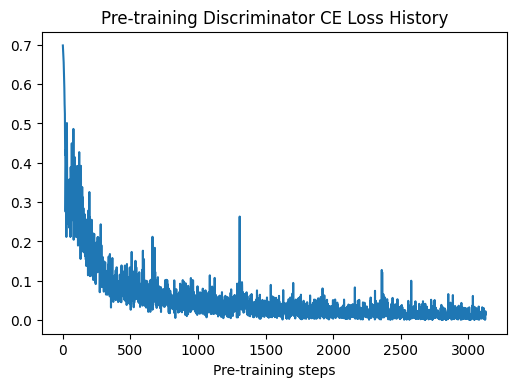

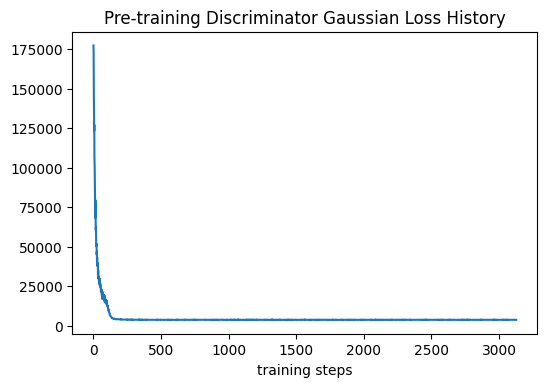

In [16]:
x = range(len(pretrain_disc_token_loss_history))
plt.figure(dpi=100)
plt.plot(x, pretrain_disc_token_loss_history)
plt.title('Pre-training Discriminator CE Loss History')
plt.xlabel('Pre-training steps')

x = range(len(pretrain_disc_gaussian_loss_history))
plt.figure(dpi=100)
plt.plot(x, pretrain_disc_gaussian_loss_history)
plt.title('Pre-training Discriminator Gaussian Loss History')
plt.xlabel('training steps')

In [ ]:
loss_save_dir = './experiment_results/without_normalization/init_pretrained/loss'
if not os.path.exists(loss_save_dir):
    os.makedirs(loss_save_dir)
    
with open(os.path.join(loss_save_dir, 'pretrain_disc_token_loss_history.pickle'), 'wb') as f:
    pickle.dump(pretrain_disc_token_loss_history, f)

with open(os.path.join(loss_save_dir, 'pretrain_disc_gaussian_loss_history.pickle'), 'wb') as f:
    pickle.dump(pretrain_disc_gaussian_loss_history, f)

### Save Pretrained D

In [ ]:
if not os.path.exists('./experiment_results/without_normalization/init_pretrained/pretrained_disc_weights'):
    os.makedirs('./experiment_results/without_normalization/init_pretrained/pretrained_disc_weights')
    
D_save_path = './experiment_results/without_normalization/init_pretrained/pretrained_disc_weights/model.tf'
pretrained_discriminator.save_weights(D_save_path)

In [20]:
reload_pretrained_disc = build_D(
    T = T,
    event_vocab_dim = EVENT_VOCAB_DIM,
    emb_dim = EMB_DIM,
    hidden_dim= HIDDEN_DIM,
    k_mixt = K_MIST
)

reload_pretrained_disc.build(input_shape=((BATCH_SIZE, T, 1), (BATCH_SIZE, T, 1)))
reload_pretrained_disc.load_weights(D_save_path)

### Save Pretrained D

In [21]:
if not os.path.exists('./experiment_results/without_normalization/init_pretrained/pretrained_disc_weights'):
    os.makedirs('./experiment_results/without_normalization/init_pretrained/pretrained_disc_weights')
    
D_save_path = './experiment_results/without_normalization/init_pretrained/pretrained_disc_weights/model.tf'
pretrained_discriminator.save_weights(D_save_path)

In [22]:
reload_pretrained_disc = build_D(
    T = T,
    event_vocab_dim = EVENT_VOCAB_DIM,
    emb_dim = EMB_DIM,
    hidden_dim= HIDDEN_DIM,
    k_mixt = K_MIST
)

reload_pretrained_disc.build(input_shape=((BATCH_SIZE, T, 1), (BATCH_SIZE, T, 1)))
reload_pretrained_disc.load_weights(D_save_path)

No Normalization in D!
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4


In [23]:
reload_pretrained_disc.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
event_type (InputLayer)         [(None, 11, 1)]      0                                            
__________________________________________________________________________________________________
time_delta (InputLayer)         [(None, 11, 1)]      0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 11, 1, 5)     25          event_type[0][0]                 
__________________________________________________________________________________________________
masking_2 (Masking)             (None, 11, 1)        0           time_delta[0][0]                 
____________________________________________________________________________________________

## Code chunk

In [ ]:
# import pickle
# import numpy as np
# import tensorflow as tf

# def load_fixed_length_sequence_from_pickle(pickle_file_path, to_timedelta=True, end_token=0):
#     """
#         A list of sequence in format of (event_type, timestamp)
#         [[(1, 11), (1, 24), (2, 37), (3, 47), (2, 63), (2, 80), (1, 88), (2, 95), (2, 104), (3, 111)], ...]
#     :param pickle_file_path: e.g. /.../project-basileus/seq-gan/data/fixed_length/valid_sequences.pickle
#     :param to_timedelta: if True, convert absolute time to timedelta
#     :param end_token: same as padding token. default 0
#     :return: (event_type_seqs, timestamp_seqs)
#     """
#     with open(pickle_file_path, 'rb') as f:
#         raw_seqs = pickle.load(f)

#     if not raw_seqs or not raw_seqs[0]:
#         return np.array([]), np.array([])

#     N = len(raw_seqs)
#     T = len(raw_seqs[0])

#     event_type_seqs = []
#     timestamp_seqs = []

#     for seq in raw_seqs:
#         _ets, _tss = [], []
#         ts_prev = 0
#         for et, ts in seq:
#             if et == end_token:
#                 raise ValueError('Actual data should NOT contain END_TOKEN', end_token)
#             _ets.append(et)  # 0 is for padding, standing for END_TOKEN or 'N/A'
#             if to_timedelta:
#                 _tss.append(ts - ts_prev)
#                 ts_prev = ts
#             else:
#                 _tss.append(ts)
#         event_type_seqs.append(_ets)
#         timestamp_seqs.append(_tss)

#     event_type_seqs = np.array(event_type_seqs).astype(np.float64).reshape((N, T, 1))
#     timestamp_seqs = np.array(timestamp_seqs).astype(np.float64).reshape((N, T, 1))

#     return event_type_seqs, timestamp_seqs

In [ ]:
# def create_self_regression_data_batch(original_feature_sample, END_TOKEN=0):
#     """
#         Create self regression dataset given original sequences
#         only support batch_size = 1 for now, aka, we have to pretrain the generator one seq by

#         e.g. original event type seq (including init token -1): [-1, 1, 2, 3, 1, 1, 3]
#         turns into a train dataset with the next token(softmax)/timstamp as the target
        
#         [-1, 0, 0, 0, 0, 0, 0] -> 1 : [0, 1.0, 0, 0]
#         [-1, 1, 0, 0, 0, 0, 0] -> 2 : [0, 0, 1.0, 0]
#         [-1, 1, 2, 0, 0, 0, 0] -> 3 : [0, 0, 0, 1.0]
#         [-1, 1, 2, 3, 0, 0, 0] -> 1 : [0, 1.0, 0, 0]
#         [-1, 1, 2, 3, 1, 0, 0] -> 1 : [0, 1.0, 0, 0]
#         [-1, 1, 2, 3, 1, 1, 0] -> 3 : [0, 0, 0, 1.0]

#         same for timestamp sequence.

#     :param original_feature_sample: tuple of numpy arrays (seq_et, seq_ts), each of shape (1, T, 1)
#     :param END_TOKEN: by default 0. so that we can fill non-zero values in np.zeros
#     :return:
#     """
#     orig_seq_et, orig_seq_ts = original_feature_sample
#     _, T_orig, _ = orig_seq_et.shape

#     self_regression_et = np.zeros((T_orig - 1, T_orig, 1))
#     self_regression_ts = np.zeros((T_orig - 1, T_orig, 1))

#     self_target_token = np.zeros((T_orig - 1, 1))
#     self_target_timestamp = np.zeros((T_orig - 1, 1))

#     for i in range(T_orig - 1):
#         self_regression_et[i, :i + 1, :] = orig_seq_et[:, :i + 1, :]
#         self_regression_ts[i, :i + 1, :] = orig_seq_ts[:, :i + 1, :]

#         self_target_token[i, :] = orig_seq_et[:, i + 1, :]
#         self_target_timestamp[i, :] = orig_seq_ts[:, i + 1, :]

#     return self_regression_et, self_regression_ts, self_target_token, self_target_timestamp

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.optimizers import Adam, SGD

# def pretrain_generator(feature_sample, generator, event_vocab_dim, verbose=False, weight_gaussian_loss=1,
#                        optimizer=Adam(lr=0.001)):
#     self_regression_et, self_regression_ts, self_target_token, _ = create_self_regression_data_batch(feature_sample)
#     # self_target_timestamp is not actually needed here,
#     # because we cauculate log-likelihood of gaussian mixture fitting original input timestamps
#     # rather than comparing the next actual timestamp with a sampled timestamp from the updated gm distribution
#     N_reg = self_regression_et.shape[0]

#     ce_loss_list = []
#     gaussian_loss_list = []

#     # train the generator
#     with tf.GradientTape() as tape:
#         for i in range(N_reg):
#             curr_state_et = self_regression_et[[i], :, :]
#             curr_state_ts = self_regression_ts[[i], :, :]

#             curr_target_token = int(self_target_token[i].item())
#             curr_target_token_prob = np.zeros((event_vocab_dim,))
#             curr_target_token_prob[curr_target_token] = 1.0

#             pred_token_prob, gaussian_log, mask, alpha, mu, sigma = generator([curr_state_et, curr_state_ts])

#             gaussian_log = gaussian_log[0, 0:i + 1, 0]  # masked to the current step only
#             gaussian_loss = -tf.reduce_sum(gaussian_log)
#             ce_loss = tf.reduce_sum(tf.keras.losses.categorical_crossentropy(
#                 curr_target_token_prob, pred_token_prob, from_logits=False, label_smoothing=0))

#             ce_loss_list.append(ce_loss)
#             gaussian_loss_list.append(gaussian_loss)

#         ce_loss_batch = tf.reduce_mean(ce_loss_list)
#         gaussian_loss_batch = tf.reduce_mean(gaussian_loss_list)
#         pretrain_generator_loss_batch = ce_loss_batch + weight_gaussian_loss * gaussian_loss_batch

#         if verbose:
#             print('pretrain generator categorical cross-entropy loss:{}'.format(ce_loss_batch))
#             print('pretrain generator gaussian loss:{}'.format(gaussian_loss_batch))

#     # apply gradient decent per batch
#     grads = tape.gradient(pretrain_generator_loss_batch, generator.trainable_variables)
#     optimizer.apply_gradients(zip(grads, generator.trainable_variables))

#     return ce_loss_batch, gaussian_loss_batch


# def pretrain_discriminator(features_batch, real_labels, discriminator, verbose=False, weight_gaussian_loss=1,
#                            optimizer=Adam(lr=0.001)):
#     # train the discriminator
#     with tf.GradientTape() as tape:
#         real_et, real_ts = features_batch

#         # train discriminator
#         true_prob, gaussian_log, mask = discriminator((real_et, real_ts))

#         # calculate masked neg-likelihood of gaussian mixture
#         gaussian_log = gaussian_log[:, :, 0:1]
#         gaussian_log = tf.boolean_mask(gaussian_log, mask)
#         gaussian_loss = -tf.reduce_sum(gaussian_log)

#         # cross-entropy loss
#         ce_loss = tf.reduce_mean(
#             tf.keras.losses.binary_crossentropy(real_labels, true_prob, from_logits=False))
#         discriminator_loss = gaussian_loss * weight_gaussian_loss + ce_loss

#         if verbose:
#             print('discriminator token loss:{}'.format(ce_loss))
#             print('discriminator gaussian loss:{}'.format(gaussian_loss))
#             print('total discriminator loss:{}'.format(discriminator_loss))

#     grads = tape.gradient(discriminator_loss, discriminator.trainable_variables)
#     optimizer.apply_gradients(zip(grads, discriminator.trainable_variables))

#     return ce_loss, gaussian_loss

## Code chunk

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Model
# from tensorflow.keras import Sequential
# from tensorflow.keras.optimizers import Adam, SGD
# from tensorflow.keras.layers import Input, LSTM, Embedding, Reshape, Dense
# import tensorflow_probability as tfp
# from tensorflow_probability import distributions as tfd

# from sgtlstm.TimeLSTM import TimeLSTM0, TimeLSTM1, TimeLSTM2, TimeLSTM3

# tf.keras.backend.set_floatx('float64')


# def build_D(T, event_vocab_dim, emb_dim, hidden_dim=11, k_mixt=7):
#     """
#         Build a discriminator for event type sequence of shape (batch_size, T, input_dim)
#         and input event type sequence of shape (batch_size, T, 1)
#     :param T: length of the sequence
#     :param event_vocab_dim: size of event vocabulary ['na', 'start', 'click', 'install']
#     :param emb_dim: dimension of the embedding layer output for event type
#     :param hidden_dim: dimension hidden of the time lstm cell
#     :param k_mixt: num of gaussian distributions in gaussian mixture model
#     :return: discriminator D
#     """
#     # Time-LSTM:
#     i_et = Input(shape=(T, 1), name='event_type')  # input of discrete feature event type
#     i_ts = Input(shape=(T, 1), name='time_delta')  # input of continuous feature timestamp
#     mask_layer = tf.keras.layers.Masking(mask_value=0., input_shape=(T, 1))
#     masked_ts = mask_layer(i_ts)

#     embed0 = Embedding(input_dim=event_vocab_dim, output_dim=emb_dim, input_length=T, mask_zero=True)(i_et)
#     embed0 = Reshape((T, emb_dim))(embed0)  # shape=[Batch_size, T, emb_dim]
#     merged0 = tf.keras.layers.concatenate([embed0, masked_ts], axis=2)  # # shape=[Batch_size, T, emb_dim + time_dim]

#     merged0 = tf.keras.layers.LayerNormalization()(merged0)
#     merged0 = tf.keras.layers.PReLU()(merged0)

#     hm, tm = TimeLSTM1(hidden_dim, activation='selu', name='time_lstm', return_sequences=False)(merged0)

#     # gaussian mixture for time delta
#     alpha = Dense(k_mixt, activation=tf.nn.softmax, name='dense_alpha')(tm)
#     mu = Dense(k_mixt, activation=None, name='dense_mu')(tm)
#     sigma = Dense(k_mixt, activation=tf.nn.softplus, name='dense_sigma')(tm)

#     gm = tfd.MixtureSameFamily(
#         mixture_distribution=tfd.Categorical(
#             probs=alpha),
#         components_distribution=tfd.Normal(
#             loc=mu,
#             scale=sigma))

#     gaussian_log = gm.log_prob(masked_ts)  # apply gaussian mixture to time stamp input

#     # mask out zeros in time stamps
#     mask = tf.not_equal(i_ts, 0)

#     # predicted real prob
#     real_prob = Dense(1, activation='sigmoid', name='fraud_prob')(hm)

#     discriminator = Model(
#         inputs=[i_et, i_ts],
#         outputs=[real_prob, gaussian_log, mask])

#     return discriminator


# def build_G(T, event_vocab_dim, emb_dim, hidden_dim=11, k_mixt=7, return_sequence=False):
#     """
#         Build a generator for event type sequence of shape (batch_size, T, input_dim)
#         and input event type sequence of shape (batch_size, T, 1)
#     :param T: length of the sequence
#     :param event_vocab_dim: size of event vocabulary ['na', 'start', 'click', 'install']
#     :param emb_dim: dimension of the embedding layer output for event type
#     :param hidden_dim: dimension hidden of the time lstm cell
#     :param k_mixt: num of gaussian distributions in gaussian mixture model
#     :param return_sequence:
#     :return:
#     """
#     # Time-LSTM:
#     i_et = Input(shape=(T, 1), name='event_type')  # input of discrete feature event type
#     i_ts = Input(shape=(T, 1), name='time_delta')  # input of continuous feature timestamp

#     mask_layer = tf.keras.layers.Masking(mask_value=0., input_shape=(T, 1))
#     masked_ts = mask_layer(i_ts)

#     embed0 = Embedding(input_dim=event_vocab_dim, output_dim=emb_dim, input_length=T, mask_zero=True)(i_et)
#     embed0 = Reshape((T, emb_dim))(embed0)
#     merged0 = tf.keras.layers.concatenate([embed0, masked_ts], axis=2)

#     # TODO: add deep layers to lstm
#     # TODO: add activation after layer norm/batch norm
#     merged0 = tf.keras.layers.LayerNormalization()(merged0)
#     merged0 = tf.keras.layers.PReLU()(merged0)

#     hm, tm = TimeLSTM1(hidden_dim, activation='selu', name='time_lstm', return_sequences=False)(merged0)

#     # gaussian mixture for time delta
#     alpha = Dense(k_mixt, activation=tf.nn.softmax, name='dense_alpha')(tm)
#     mu = Dense(k_mixt, activation=None, name='dense_mu')(tm)
#     sigma = Dense(k_mixt, activation=tf.nn.softplus, name='dense_sigma')(tm)

#     # add regularization to sigma to avoid GM collapse
#     print('sigma > 1 !')
#     sigma = tf.clip_by_value(sigma, clip_value_min=1.0, clip_value_max=1024)

#     gm = tfd.MixtureSameFamily(
#         mixture_distribution=tfd.Categorical(
#             probs=alpha),
#         components_distribution=tfd.Normal(
#             loc=mu,
#             scale=sigma))

#     # mask out zeros in time stamps
#     mask = tf.not_equal(i_ts, 0)
#     gaussian_log = gm.log_prob(masked_ts)  # apply gaussian mixture to time stamp input

#     # predicted prob of next token
#     token_prob = Dense(event_vocab_dim, activation='softmax', name='token_prob')(hm)

#     model_gen = Model(
#         inputs=[i_et, i_ts],
#         outputs=[token_prob, gaussian_log, mask, alpha, mu, sigma])

#     return model_gen


## Debug 

In [ ]:
valid_event_type_seqs.shape

In [ ]:
for feature_sample, label_sample in pretrain_dataset.take(1):
    print('feature_sample =', feature_sample)
    print('label_sample =', label_sample)

In [ ]:
feature_sample[0].shape

In [ ]:
valid_event_type_seqs[0]